- Regresja logistyczna glm 
- model liniowy lm
- Kwadratowa analiza dyskryminacyjna QDA(dzielimy na 2 grupy na podstawie zmiennej grupujacej)
- lda(nie dzielimy)

# Lista 1

## Zadanie 1, L1

In [204]:
install.packages("ISwR")
install.packages("car")
install.packages('ipred')
install.packages("rpart.plot")
install.packages("rpart")

Warning message:
"pakiet 'ISwR' jest w użyciu i nie zostanie zainstalowany"
Warning message:
"pakiet 'car' jest w użyciu i nie zostanie zainstalowany"
Warning message:
"pakiet 'ipred' jest w użyciu i nie zostanie zainstalowany"
Warning message:
"pakiet 'rpart.plot' jest w użyciu i nie zostanie zainstalowany"
Warning message:
"pakiet 'rpart' jest w użyciu i nie zostanie zainstalowany"


In [205]:
library(car)
library(ISwR)
library(datasets)
library(MASS)
library(data.table)
library(dplyr)
library(ipred)
library(rpart.plot)
library(rpart)

In [206]:
data(kfm)
head(kfm)

,no,dl.milk,sex,weight,ml.suppl,mat.weight,mat.height
,<int>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>
1,1,8.42,boy,5.002,250,65,173
2,4,8.44,boy,5.128,0,48,158
3,5,8.41,boy,5.445,40,62,160
4,10,9.65,boy,5.106,60,55,162
5,12,6.44,boy,5.196,240,58,170
6,16,6.29,boy,5.526,0,56,153


In [207]:
colnames(kfm)=c("no","dl_milk","sex","weight","ml_suppl","mat_weight","mat_height")
head(kfm)

,no,dl_milk,sex,weight,ml_suppl,mat_weight,mat_height
,<int>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>
1,1,8.42,boy,5.002,250,65,173
2,4,8.44,boy,5.128,0,48,158
3,5,8.41,boy,5.445,40,62,160
4,10,9.65,boy,5.106,60,55,162
5,12,6.44,boy,5.196,240,58,170
6,16,6.29,boy,5.526,0,56,153


### a)  
Przeanalizuj i zinterpretuj wpływ zmiennych objaśniających sex,
weight, ml.suppl, mat.weight, mat.height na ilość spożytego mleka (dl.milk)
przy użyciu modelu regresji wielokrotnej.

In [208]:
model <- lm(dl_milk ~ . -no, data = kfm)
summary(model)


Call:
lm(formula = dl_milk ~ . - no, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74201 -0.81173 -0.00926  0.78326  2.52646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.681839   4.361561  -2.678 0.010363 *  
sexgirl      -0.499532   0.312672  -1.598 0.117284    
weight        1.349124   0.322450   4.184 0.000135 ***
ml_suppl     -0.002233   0.001241  -1.799 0.078829 .  
mat_weight    0.006212   0.023708   0.262 0.794535    
mat_height    0.072278   0.030169   2.396 0.020906 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.075 on 44 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.4943 
F-statistic: 10.58 on 5 and 44 DF,  p-value: 1.03e-06


### Interpretacja
- Najistotniejszy wpływ na ilość spożytego mleka ma waga dziecka, istotny wpływ ma wzrost matki.
- Rozkład reszt : minimalna wartość wynosi -1,742, mediana to -0.00926, a maksymalna wartość wynosi: 2.526
- Średnia reszt jest bliska zeru a wartości minimum i maximum są z grubsza równe wartości bezwzględnej.
- Współczynnik regresji dla weight wynosi 1.349 , błąd standardowy to 0.32245, a wartość p_value : 0. Waga dziecka ma istotny wpływ na ilość spożytego mleka.
- Błąd standardowy reszt opisujący wahania obserwacji wokół prostej regresji przy wyestymowanych współczynnikach modelu wynosi: 1.075 dla 44 stopni swobody.
- Współczynnik korelacji Pearsona wyniósł 0.5459, jest to silna korelacja dodatnia.
- Skorygowana wartość R^2 jest równa 0.4943.

### b )
Zauważ, że zmienna ’płeć’ (sex) jest zmienną o dwóch poziomach: boy
(chłopiec) i ’girl’ (dziewczynka). Jakie ma to znaczenie dla przeprowadzonej
analizy?

- Jest to zmienna dychotomiczna jakościowa i kategoryczna  co oznacza, że wyraża jakość, a jednocześnie pozwala na grupowanie spraw w kategorie.
- Podstawowa różnica między zmienną dychotomiczną a zmienną ciągłą polega na tym, że pierwsza reprezentuje kategorie, podczas gdy druga mierzy

### c)
Przedstaw i zinterpretuj wykres zależności parami oraz macierz korelacji między zmiennymi.

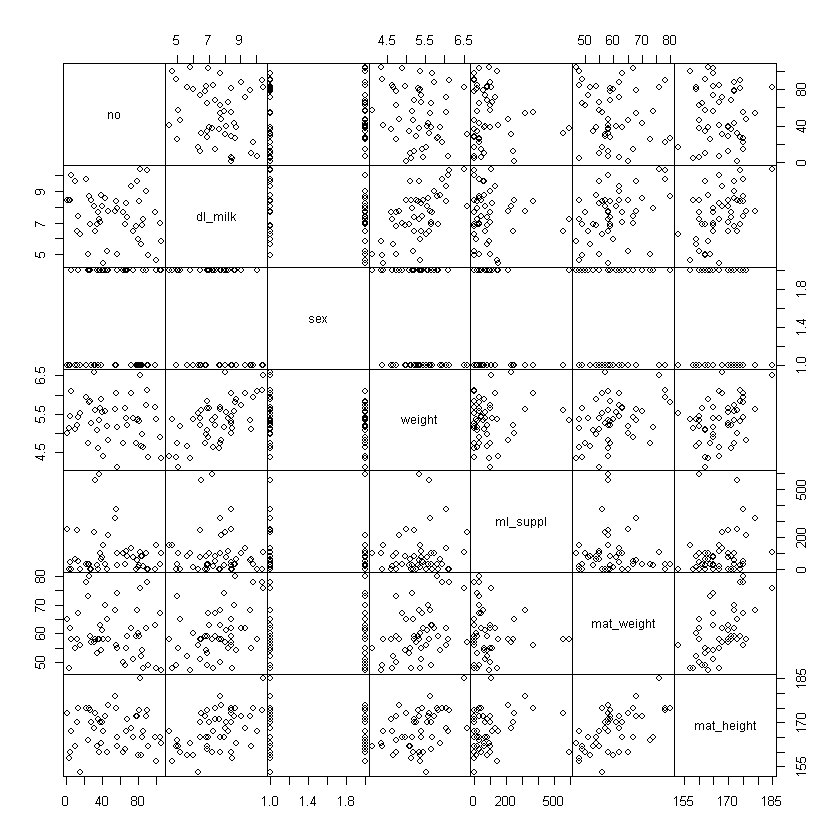

In [209]:
par(mex =0.5)
pairs(kfm , gap =0 , cex.labels =0.9)

In [210]:
kfm2=kfm[-c(3)]
kfm2

no,dl_milk,weight,ml_suppl,mat_weight,mat_height
<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,8.42,5.002,250,65,173
4,8.44,5.128,0,48,158
5,8.41,5.445,40,62,160
10,9.65,5.106,60,55,162
12,6.44,5.196,240,58,170
16,6.29,5.526,0,56,153
22,9.79,5.928,30,78,175
28,8.43,5.263,0,57,170
31,8.05,6.578,230,57,168


In [211]:
cor(kfm2)

,no,dl_milk,weight,ml_suppl,mat_weight,mat_height
no,1.00000000,-0.18068364,-0.1649280,-0.12978958,-0.13731160,-0.02356765
dl_milk,-0.18068364,1.00000000,0.6360448,-0.06351955,0.43427002,0.50504203
weight,-0.16492803,0.63604482,1.0000000,0.12838120,0.40817476,0.38675714
ml_suppl,-0.12978958,-0.06351955,0.1283812,1.00000000,-0.07887363,0.18230263
mat_weight,-0.13731160,0.43427002,0.4081748,-0.07887363,1.00000000,0.56473304
mat_height,-0.02356765,0.50504203,0.3867571,0.18230263,0.56473304,1.00000000


### Interpretacja
- Najwyższą korelację możemy zauważyć między wagą dziecka i ilością mleka. Wynosi ona 0.636. silna korelacja dodatnia. Na wykresie również możemy zauważyć dodatnią korelację.

### d)
Przyjmując poziom istotności równy 0.05 dokonaj krokowej procedury wyboru modelu startując z modelu zawierającego wszystkie zmienne i
eliminując zmienne nieistotne o największej p-wartości. Napisz i zinterpretuj
otrzymany końcowy model.

In [212]:
summary(lm( dl_milk ~ . -no, data = kfm))
summary(lm( dl_milk ~ . -no -mat_weight, data = kfm))
summary(lm( dl_milk ~ . -no -mat_weight -sex, data = kfm))
summary(lm( dl_milk ~ . -no -mat_weight -sex -ml_suppl, data = kfm))


Call:
lm(formula = dl_milk ~ . - no, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74201 -0.81173 -0.00926  0.78326  2.52646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.681839   4.361561  -2.678 0.010363 *  
sexgirl      -0.499532   0.312672  -1.598 0.117284    
weight        1.349124   0.322450   4.184 0.000135 ***
ml_suppl     -0.002233   0.001241  -1.799 0.078829 .  
mat_weight    0.006212   0.023708   0.262 0.794535    
mat_height    0.072278   0.030169   2.396 0.020906 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.075 on 44 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.4943 
F-statistic: 10.58 on 5 and 44 DF,  p-value: 1.03e-06



Call:
lm(formula = dl_milk ~ . - no - mat_weight, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77312 -0.81196 -0.00683  0.76988  2.52240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.112571   3.997860  -3.030  0.00405 ** 
sexgirl      -0.494675   0.308875  -1.602  0.11626    
weight        1.372524   0.306612   4.476 5.14e-05 ***
ml_suppl     -0.002313   0.001190  -1.943  0.05824 .  
mat_height    0.076363   0.025560   2.988  0.00454 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.064 on 45 degrees of freedom
Multiple R-squared:  0.5452,	Adjusted R-squared:  0.5047 
F-statistic: 13.48 on 4 and 45 DF,  p-value: 2.658e-07



Call:
lm(formula = dl_milk ~ . - no - mat_weight - sex, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06540 -0.74758 -0.02408  0.67488  2.79882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.064926   4.020073  -3.250  0.00216 ** 
weight        1.464781   0.306231   4.783 1.81e-05 ***
ml_suppl     -0.002237   0.001209  -1.850  0.07074 .  
mat_height    0.077600   0.025979   2.987  0.00451 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.082 on 46 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.4879 
F-statistic: 16.56 on 3 and 46 DF,  p-value: 1.953e-07



Call:
lm(formula = dl_milk ~ . - no - mat_weight - sex - ml_suppl, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19598 -0.82149  0.01822  0.75582  2.83375 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.92014    4.07325  -2.926  0.00527 ** 
weight        1.42862    0.31338   4.559 3.67e-05 ***
mat_height    0.07063    0.02636   2.680  0.01013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.109 on 47 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4615 
F-statistic:    22 on 2 and 47 DF,  p-value: 1.811e-07


### Interpretacja
- Ostateczny model:Dl_milk=-11.92014 + 1.42862*weight + 0.07063*mat_height
- Ilość spożytego mleka zwiększa się o 1.42862 wraz z każdym kilogramem dziecka i o 0.07063 wraz z każdym cm dziecka.

## Zadanie 2, L1

In [213]:
data(iris)
attach(iris)
head(iris)
unique(iris[5])

Następujące obiekty zostały zakryte z iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species




,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Species
,<fct>
1,setosa
51,versicolor
101,virginica


### a)
Narysuj histogramy rozkładu długości i szerokości kielicha dla trzech
analizowanych gatunków.

In [214]:
iris.versicolor <- iris[iris$Species=="versicolor",1:4]
iris.setosa <- iris[iris$Species=="setosa",1:4]
iris.virginica <- iris[iris$Species=="virginica",1:4]

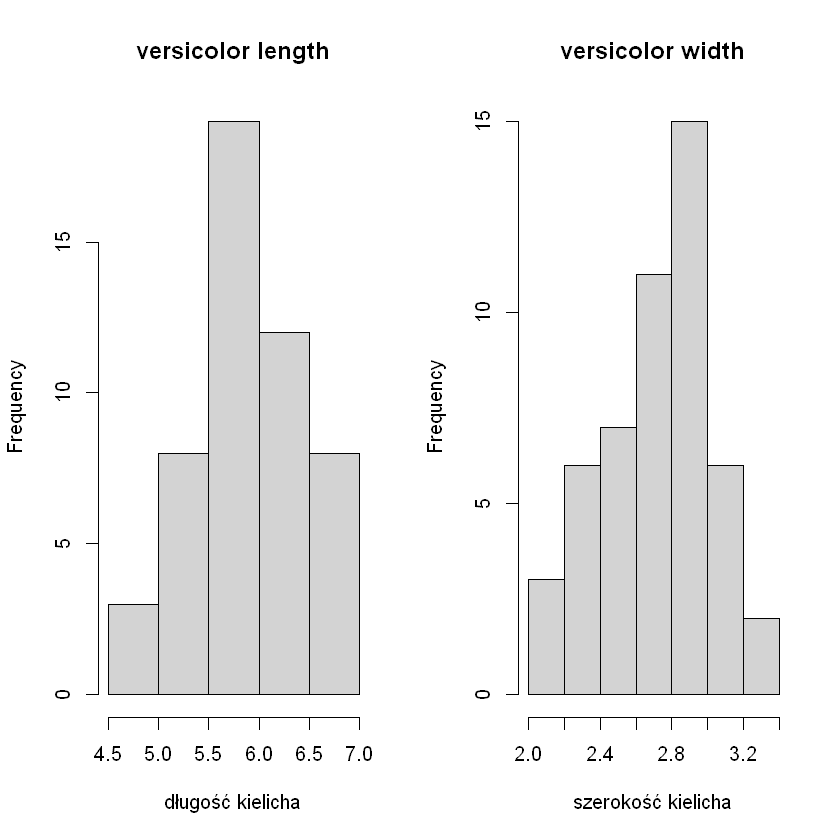

In [215]:
par(mfrow = c(1, 2))
hist(iris.versicolor$Sepal.Length, xlab= "długość kielicha", main="versicolor length")
hist(iris.versicolor$Sepal.Width, xlab= "szerokość kielicha", main="versicolor width")

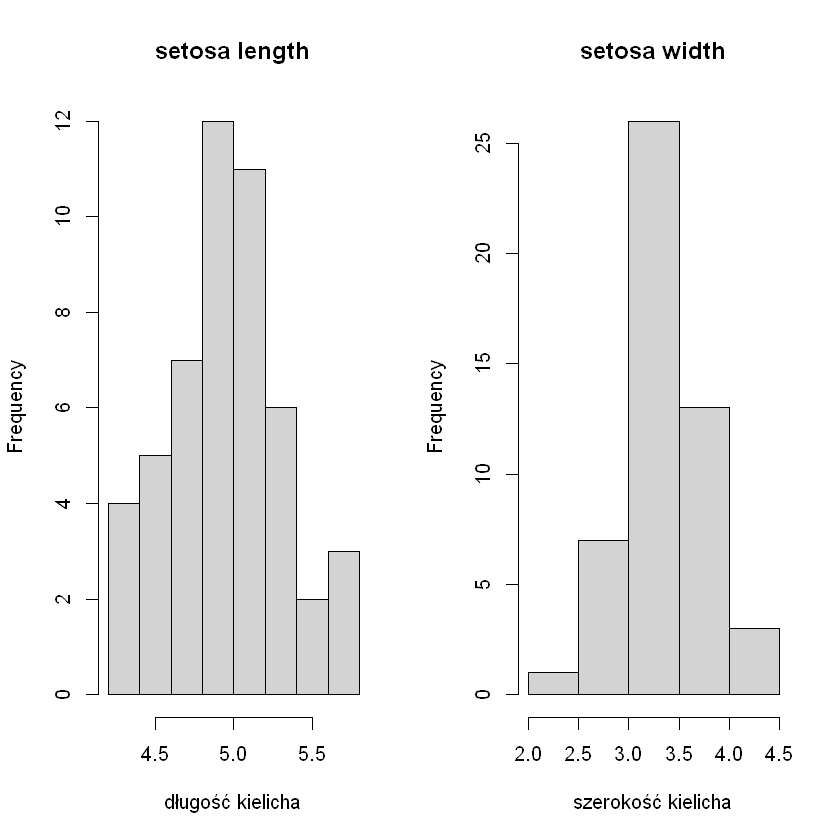

In [216]:
par(mfrow = c(1, 2))
hist(iris.setosa$Sepal.Length, xlab= "długość kielicha", main="setosa length")
hist(iris.setosa$Sepal.Width, xlab= "szerokość kielicha", main="setosa width")

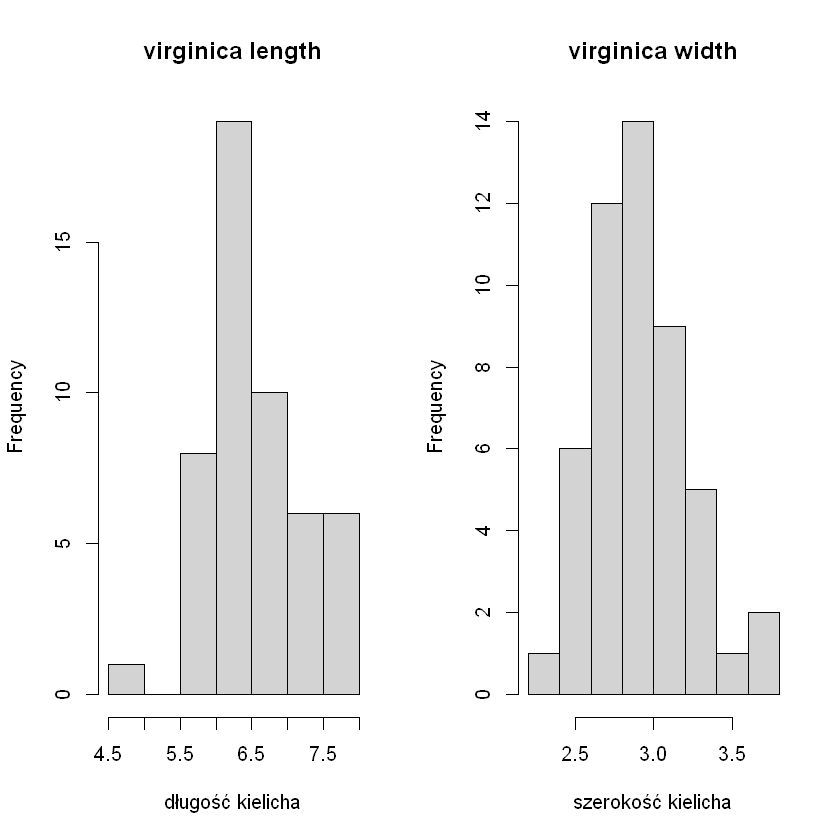

In [217]:
par(mfrow = c(1, 2))
hist(iris.virginica$Sepal.Length, xlab= "długość kielicha", main="virginica length")
hist(iris.virginica$Sepal.Width, xlab= "szerokość kielicha", main="virginica width")

### b)
Przedstaw wykresy korelacji parami dla długości i szerokości kielicha
oraz długości i szerokości płatka (dla każdego gatunku osobno). Jakie widzisz
zależności?

In [218]:
iris.versicolor

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
51,7.0,3.2,4.7,1.4
52,6.4,3.2,4.5,1.5
53,6.9,3.1,4.9,1.5
54,5.5,2.3,4.0,1.3
55,6.5,2.8,4.6,1.5
56,5.7,2.8,4.5,1.3
57,6.3,3.3,4.7,1.6
58,4.9,2.4,3.3,1.0
59,6.6,2.9,4.6,1.3


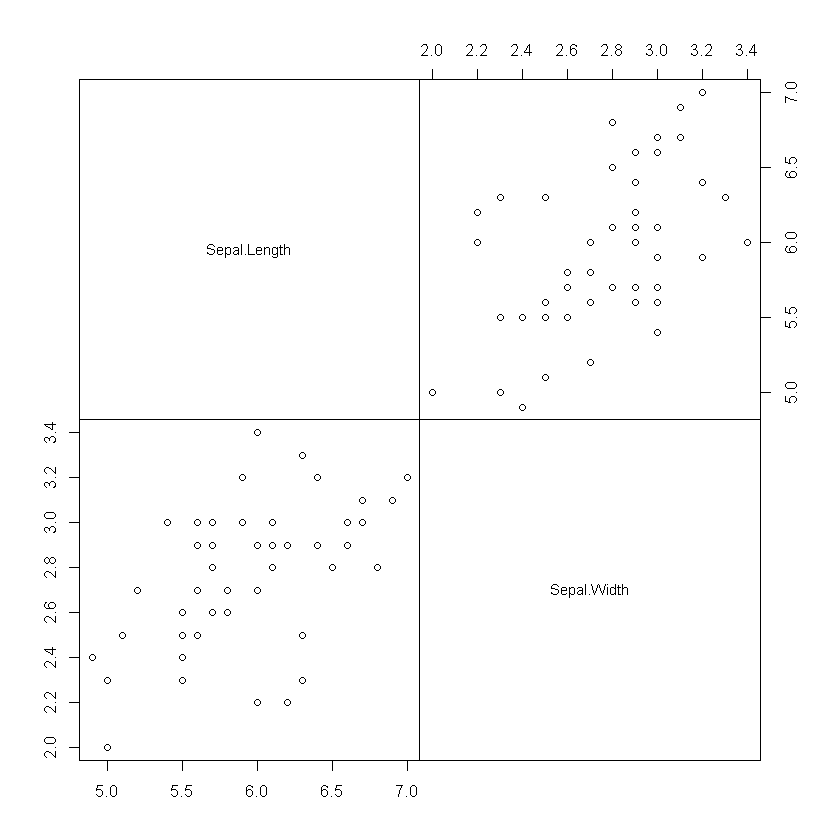

In [219]:
iris.versicolor.sepal <- iris.versicolor[1:2]
par(mex =0.5)
pairs(iris.versicolor.sepal, gap=0, cex.labels=0.9)

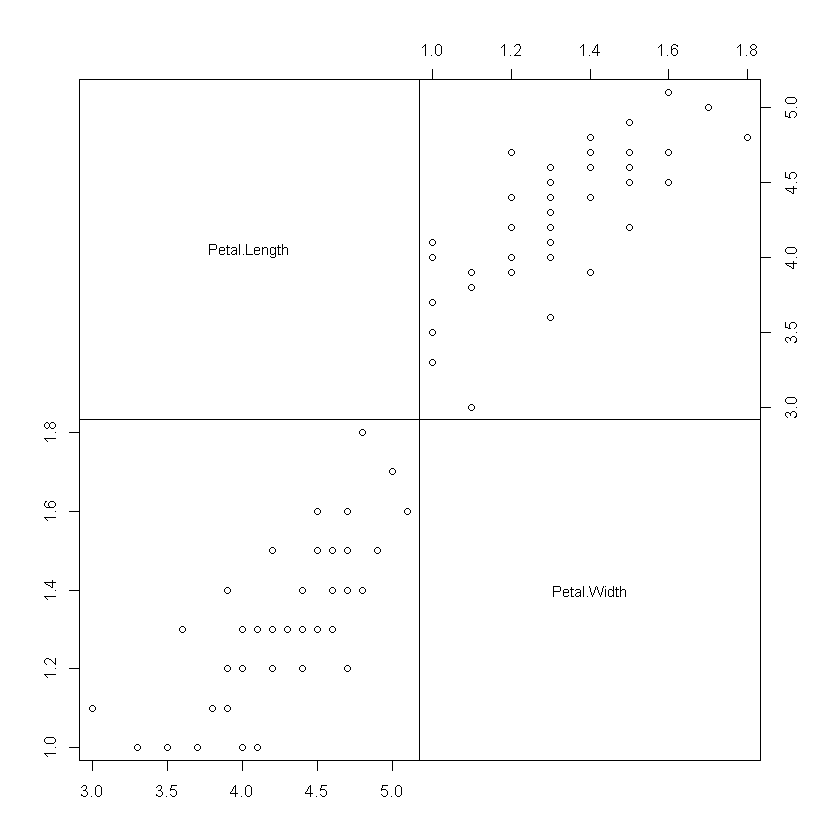

In [220]:
iris.versicolor.petal <- iris.versicolor[3:4]
par(mex =0.5)
pairs(iris.versicolor.petal, gap=0, cex.labels=0.9)

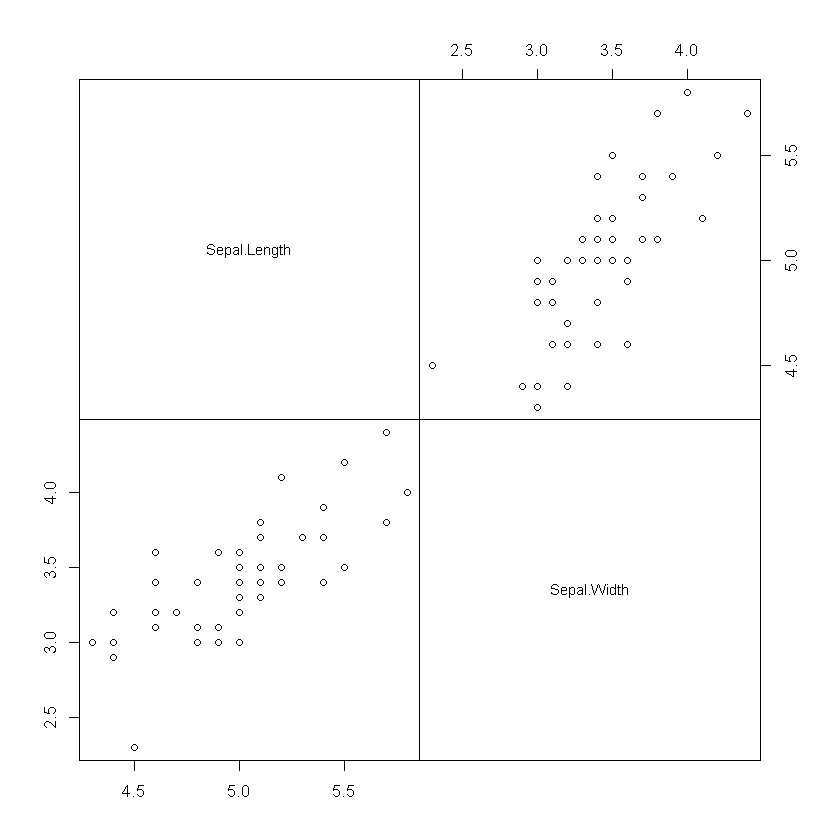

In [221]:
iris.setosa.sepal <- iris.setosa[1:2]
par(mex =0.5)
pairs(iris.setosa.sepal, gap=0, cex.labels=0.9)

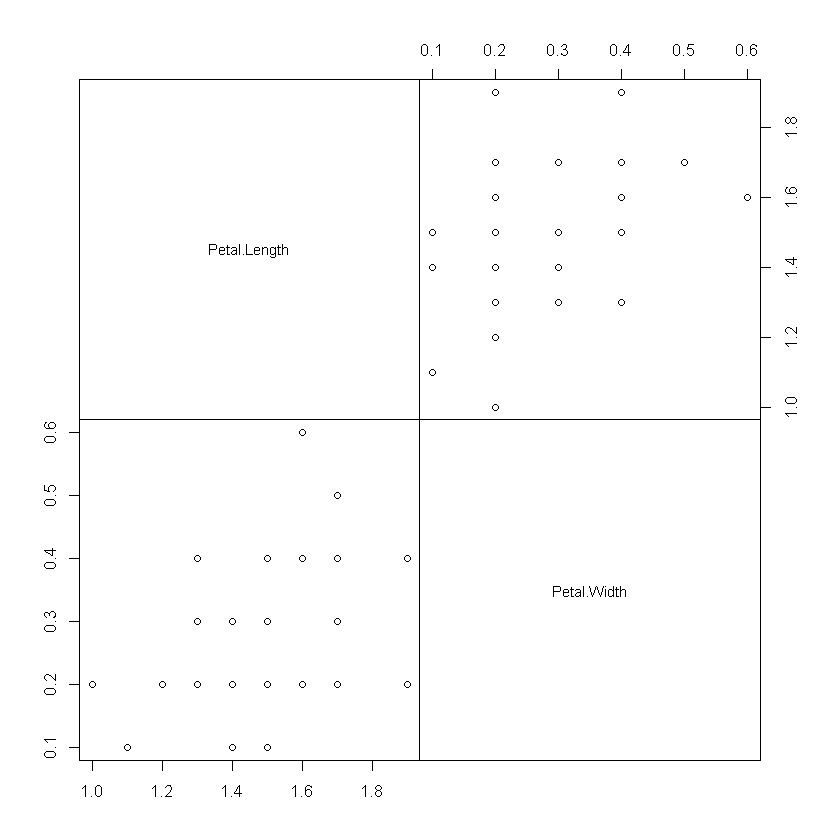

In [222]:
iris.setosa.petal <- iris.setosa[3:4]
par(mex =0.5)
pairs(iris.setosa.petal, gap=0, cex.labels=0.9)

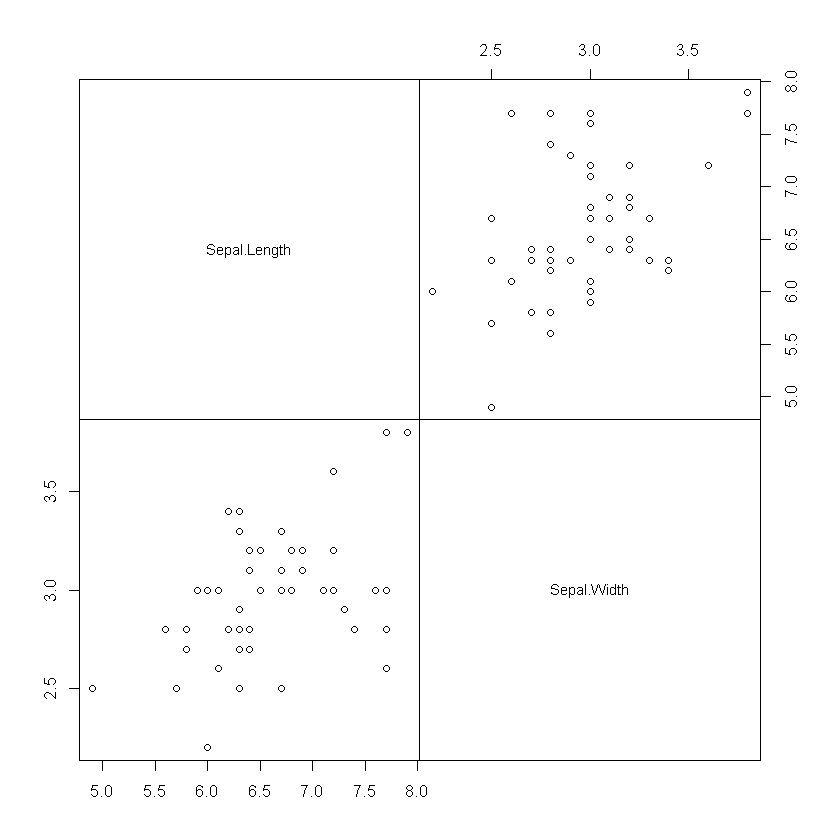

In [223]:
iris.virginica.sepal <- iris.virginica[1:2]
par(mex =0.5)
pairs(iris.virginica.sepal, gap=0, cex.labels=0.9)

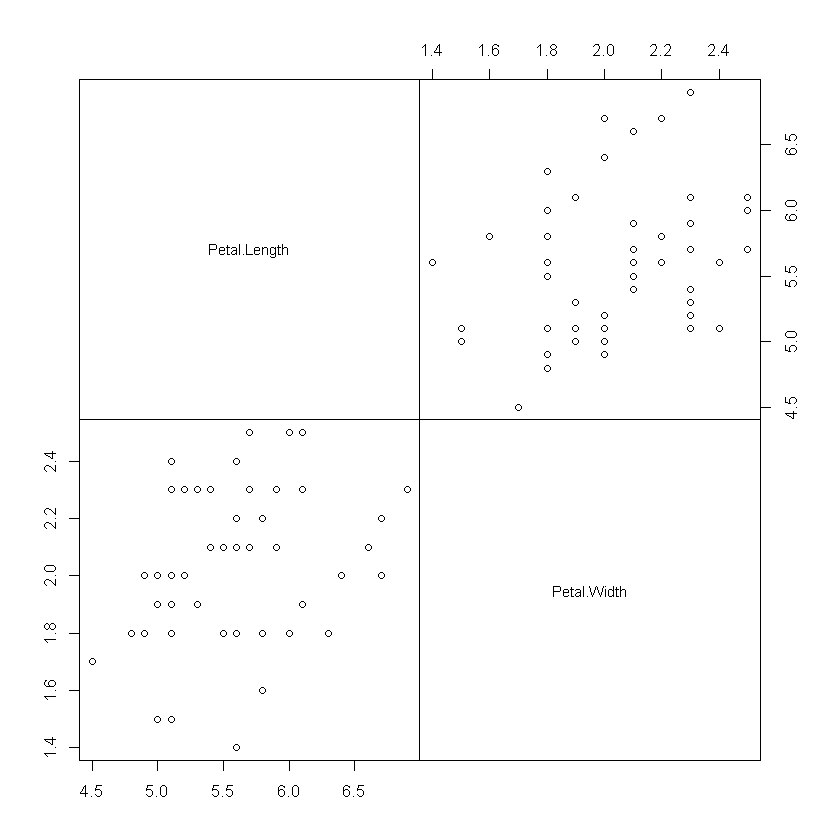

In [224]:
iris.virginica.petal <- iris.virginica[3:4]
par(mex =0.5)
pairs(iris.virginica.petal, gap=0, cex.labels=0.9)

### Interpretacja
- Wraz ze wzrostem długości kielicha, wzrasta jego szerokość

### c)
Porównaj wartości współczynników korelacji dla długości kielicha i
długości płatka. Dla którego z gatunków korelacja ta jest największa? Sprawdź
istotność tych współczynników korelacji. Jakie dwie zmienne są najmocniej
skorelowane dla poszczególnych gatunków?

In [225]:
cor.test(iris.versicolor$Sepal.Length, iris.versicolor$Petal.Length)


	Pearson's product-moment correlation

data:  iris.versicolor$Sepal.Length and iris.versicolor$Petal.Length
t = 7.9538, df = 48, p-value = 2.586e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6020680 0.8532995
sample estimates:
     cor 
0.754049 


### Interpretacja
- Współczynnik korelacji jest istotny statystycznie

In [226]:
cor.test(iris.setosa$Sepal.Length, iris.setosa$Petal.Length)


	Pearson's product-moment correlation

data:  iris.setosa$Sepal.Length and iris.setosa$Petal.Length
t = 1.9209, df = 48, p-value = 0.0607
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01206954  0.50776233
sample estimates:
      cor 
0.2671758 


### Interpretacja
- Współczynnik korelacji nie jest istotny statystycznie

In [227]:
cor.test(iris.virginica$Sepal.Length, iris.virginica$Petal.Length)


	Pearson's product-moment correlation

data:  iris.virginica$Sepal.Length and iris.virginica$Petal.Length
t = 11.901, df = 48, p-value = 6.298e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7714542 0.9210172
sample estimates:
      cor 
0.8642247 


### Interpretacja
- Współczynnik korelacji jest istotny statystycznie
- Przy gatunku virginica występuje najwyższa korelacja

### d)
 Dla gatunku setosa przeanalizuj i zinterpretuj wpływ zmiennych objaśniających Petal.Width (szerokość płatka), Sepal.Length (długość
kielicha), Sepal.Width (szerokość kielicha) na zmienną Petal.Length
(długość płatka) przy użyciu modelu regresji wielokrotnej. Przyjmując
poziom istotności równy 0.05 dokonaj krokowej procedury wyboru modelu
eliminując zmienne nieistotne o największej p-wartości. Napisz i zinterpretuj
otrzymany końcowy model.

In [228]:
summary(lm(iris.setosa$Petal.Length ~ iris.setosa$Petal.Width + iris.setosa$Sepal.Length + iris.setosa$Sepal.Width))


Call:
lm(formula = iris.setosa$Petal.Length ~ iris.setosa$Petal.Width + 
    iris.setosa$Sepal.Length + iris.setosa$Sepal.Width)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38868 -0.07905  0.00632  0.10095  0.48238 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               0.86547    0.34331   2.521   0.0152 *
iris.setosa$Petal.Width   0.46253    0.23410   1.976   0.0542 .
iris.setosa$Sepal.Length  0.11606    0.10162   1.142   0.2594  
iris.setosa$Sepal.Width  -0.02865    0.09334  -0.307   0.7602  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1657 on 46 degrees of freedom
Multiple R-squared:  0.1449,	Adjusted R-squared:  0.08914 
F-statistic: 2.598 on 3 and 46 DF,  p-value: 0.06356


In [229]:
summary(lm(iris.setosa$Petal.Length ~ iris.setosa$Petal.Width + iris.setosa$Sepal.Length))


Call:
lm(formula = iris.setosa$Petal.Length ~ iris.setosa$Petal.Width + 
    iris.setosa$Sepal.Length)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40293 -0.08425  0.00073  0.09455  0.47839 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               0.88128    0.33614   2.622   0.0117 *
iris.setosa$Petal.Width   0.45959    0.23164   1.984   0.0531 .
iris.setosa$Sepal.Length  0.09342    0.06925   1.349   0.1838  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1641 on 47 degrees of freedom
Multiple R-squared:  0.1432,	Adjusted R-squared:  0.1067 
F-statistic: 3.926 on 2 and 47 DF,  p-value: 0.0265


In [230]:
summary(lm(iris.setosa$Petal.Length ~ iris.setosa$Petal.Width))


Call:
lm(formula = iris.setosa$Petal.Length ~ iris.setosa$Petal.Width)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43686 -0.09151 -0.03686  0.09018  0.46314 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.32756    0.05996  22.141   <2e-16 ***
iris.setosa$Petal.Width  0.54649    0.22439   2.435   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1655 on 48 degrees of freedom
Multiple R-squared:   0.11,	Adjusted R-squared:  0.09144 
F-statistic: 5.931 on 1 and 48 DF,  p-value: 0.01864


### Interpretacja
- Model: 1.32756 + 0.54649x Przy wzroście wartości Petal width o jedną jednostkę wartość petal length rośnie o 0.54649 jednostki.
- Rozkład reszt : minimalna wartość wynosi -0.44, mediana to -0.037, a maksymalna wartość wynosi: 0.46
- Średnia reszt jest bliska zeru a wartości minimum i maximum są z grubsza równe wartości bezwzględnej.
- Współczynnik regresji dla iris.setosa$petal.width wynosi 0.54649, błąd standardowy to 0.22439, a wartość p_value : 0.01 < p < 0.05. szerokość płatka ma istotny wpływ na długość płatka.
- Błąd standardowy reszt opisujący wahania obserwacji wokół prostej regresji przy wyestymowanych współczynnikach modelu wynosi: 0.1655 dla 48 stopni swobody.
- Współczynnik korelacji Pearsona wyniósł 0.11, jest to słaba korelacja dodatnia.
- Skorygowana wartość R^2 jest równa 0.09144. Na długość płatka ma wpływ szerokość płatka w  9.144% .


# Lista 2

## Zadanie 3, L2

In [231]:
data(stackloss)
head(stackloss)
attach(stackloss)

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
,<dbl>,<dbl>,<dbl>,<dbl>
1,80,27,89,42
2,80,27,88,37
3,75,25,90,37
4,62,24,87,28
5,62,22,87,18
6,62,23,87,18


Następujący obiekt został zakryty _przez_ .GlobalEnv:

    stack.loss


Następujące obiekty zostały zakryte z stackloss (pos = 4):

    Acid.Conc., Air.Flow, stack.loss, Water.Temp


Następujący obiekt został zakryty z package:datasets:

    stack.loss




In [232]:
model = lm(stack.loss~Acid.Conc.)
summary(model)


Call:
lm(formula = stack.loss ~ Acid.Conc.)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.584  -5.584  -3.066   1.247  22.416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -47.9632    34.5044  -1.390   0.1806  
Acid.Conc.    0.7590     0.3992   1.901   0.0725 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.565 on 19 degrees of freedom
Multiple R-squared:  0.1599,	Adjusted R-squared:  0.1156 
F-statistic: 3.615 on 1 and 19 DF,  p-value: 0.07252


In [233]:
model0 = lm(stack.loss~Water.Temp)
summary(model0)


Call:
lm(formula = stack.loss ~ Water.Temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
Water.Temp    2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07


In [234]:
model2 = lm(stack.loss~Water.Temp + Acid.Conc.)
summary(model2)


Call:
lm(formula = stack.loss ~ Water.Temp + Acid.Conc.)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8197 -2.8600 -0.6656  3.1235  8.3295 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -51.2361    18.5374  -2.764   0.0128 *  
Water.Temp    2.7320     0.3949   6.919 1.82e-06 ***
Acid.Conc.    0.1290     0.2329   0.554   0.5866    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.137 on 18 degrees of freedom
Multiple R-squared:  0.7704,	Adjusted R-squared:  0.7449 
F-statistic:  30.2 on 2 and 18 DF,  p-value: 1.772e-06


### Interpretacja
- W modelu powinna znaleźć się tylko zmienna Water.Temp.
- Acid.Conc. nie jest istotna statystycznie.

### ii)
Czy któraś z obserwacji może być uznana za obserwację o dużej dźwigni?

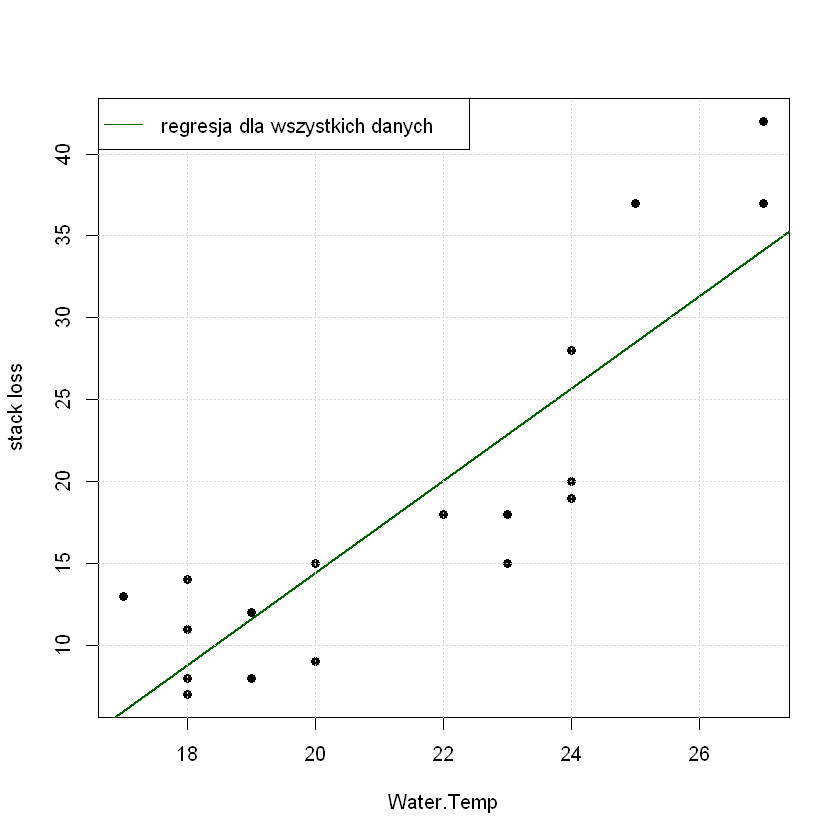

In [235]:
plot(Water.Temp, stack.loss, ylab = "stack loss", xlab = "Water.Temp", pch = 19)
abline(model0, col = "darkgreen", lwd = 2)
grid()
legend("topleft", c("regresja dla wszystkich danych"), col = c("darkgreen"),
                    lty = c(1), pch = c(NA), lwd = c(1))

### Interpretacja
- Na podstawie analizy powyższego wykresu można zaobserwować punkt o dużej dźwigni, jego wartość Water.Temp = 25.

In [236]:
(punkt_o_duzej_dzwigni = which(Water.Temp == 25))
model3 <- lm(stack.loss[-punkt_o_duzej_dzwigni]~Water.Temp[-punkt_o_duzej_dzwigni])
summary(model3)

[1] 3


Call:
lm(formula = stack.loss[-punkt_o_duzej_dzwigni] ~ Water.Temp[-punkt_o_duzej_dzwigni])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0696 -3.6844 -0.2418  3.5807  9.4168 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -38.3836     7.3540  -5.219 5.79e-05 ***
Water.Temp[-punkt_o_duzej_dzwigni]   2.6284     0.3482   7.548 5.55e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.721 on 18 degrees of freedom
Multiple R-squared:  0.7599,	Adjusted R-squared:  0.7466 
F-statistic: 56.97 on 1 and 18 DF,  p-value: 5.553e-07


### iii)
Jeśli tak, przedstaw na wykresie prostą regresji dopasowaną do wszystkich obserwacji oraz prostą dopasowaną po usunięciu tego punktu.

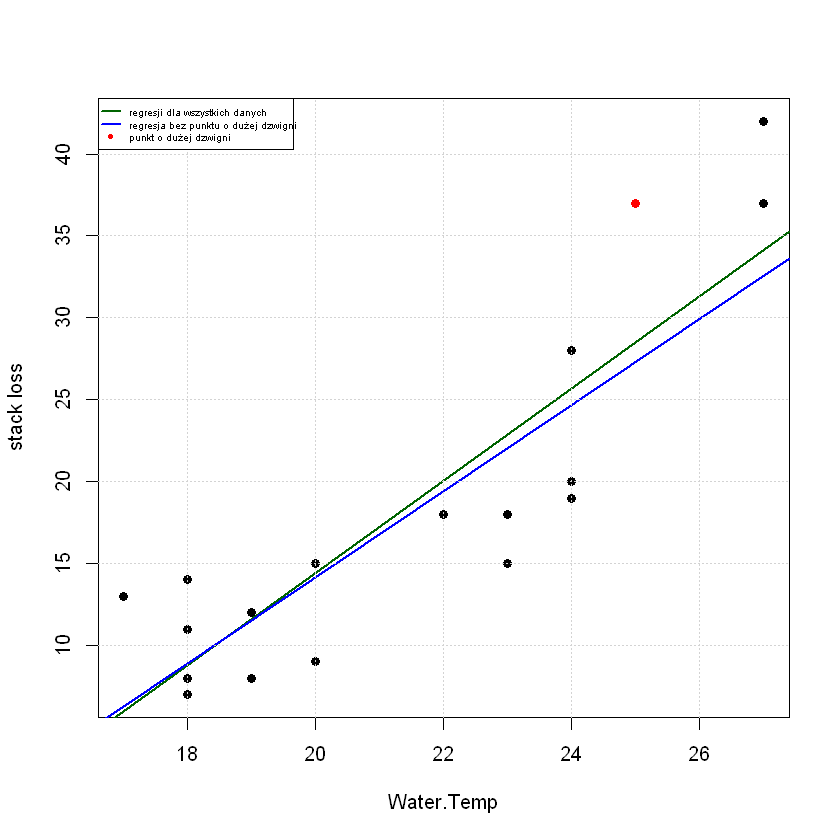

In [237]:
plot(Water.Temp, stack.loss, ylab = "stack loss", xlab = "Water.Temp", pch = 19)
abline(model0, col = "darkgreen", lwd = 2)
abline(model3, col = "blue", lwd = 2)
points(Water.Temp[c(3)],stack.loss[c(3)], col = "red", pch = 19)

grid()
legend("topleft", c("regresji dla wszystkich danych", 
                    "regresja bez punktu o dużej dzwigni", "punkt o dużej dzwigni"), col = c("darkgreen", "blue", "red"),
                    lty = c(1, 1, NA), pch = c(NA, NA, 19), lwd = c(2, 2, NA),cex=0.5)

### iv)
Przedstaw podsumowania obu modeli. Czy usunięcie punktu o dużej dźwigni spowodowało zmianę w dopasowaniu modelu? Podaj dokładność dopasowania dla obu modeli.

In [238]:
summary(model0)


Call:
lm(formula = stack.loss ~ Water.Temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
Water.Temp    2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07


In [239]:
summary(model3)


Call:
lm(formula = stack.loss[-punkt_o_duzej_dzwigni] ~ Water.Temp[-punkt_o_duzej_dzwigni])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0696 -3.6844 -0.2418  3.5807  9.4168 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -38.3836     7.3540  -5.219 5.79e-05 ***
Water.Temp[-punkt_o_duzej_dzwigni]   2.6284     0.3482   7.548 5.55e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.721 on 18 degrees of freedom
Multiple R-squared:  0.7599,	Adjusted R-squared:  0.7466 
F-statistic: 56.97 on 1 and 18 DF,  p-value: 5.553e-07


### Interpretacja
- Dopasowanie przed usunięciem punktów dużej dźwigni wynosiło 0.7542, natomiast po usunięciu danego punktu osiągnęło poziom 0.7466.
- Usunięcie tego punktu zmniejszyło błąd standardowy reszt o około 0.3.

### v)
Dla modelu dopasowanego do pełnego zbioru danych wyznacz reszty studentyzowane.

In [240]:
reszty_stud = rstudent(model0)
summary(reszty_stud)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.69706 -0.73530  0.07593  0.02370  0.62827  1.91791 

### vi)
Wyznacz obserwacje odstające korzystając z wektora reszt studentyzowanych.

In [241]:
k = which(abs(reszty_stud) > 2)
k

named integer(0)

### vii)
Wyznacz obserwacje odstające korzystając z testu outlierTest.

In [242]:
outlierTest(model0)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferroni p
3 1.917911           0.071129           NA

### Interpretacja
- Nie znaleziono żadnych obserwacji odstających

### viii)
Przedstaw i skomentuj wykres wpływów, zaznacz 3 obserwacje o największych odległościach Cooka.

Warning message in plot.window(...):
"'id.method' nie jest parametrem graficznym"
Warning message in plot.window(...):
"'id.n' nie jest parametrem graficznym"
Warning message in plot.window(...):
"'id.cex' nie jest parametrem graficznym"
Warning message in plot.xy(xy, type, ...):
"'id.method' nie jest parametrem graficznym"
Warning message in plot.xy(xy, type, ...):
"'id.n' nie jest parametrem graficznym"
Warning message in plot.xy(xy, type, ...):
"'id.cex' nie jest parametrem graficznym"
Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.method' nie jest parametrem graficznym"
Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.n' nie jest parametrem graficznym"
Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.cex' nie jest parametrem graficznym"
Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.method' nie jest parametrem graficznym"
Warning message in axis(side = side, at = at, labels = lab

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1,1.8759536,0.2221163,0.44361619
2,0.6282651,0.2221163,0.05820793
3,1.9179109,0.1239276,0.22802446


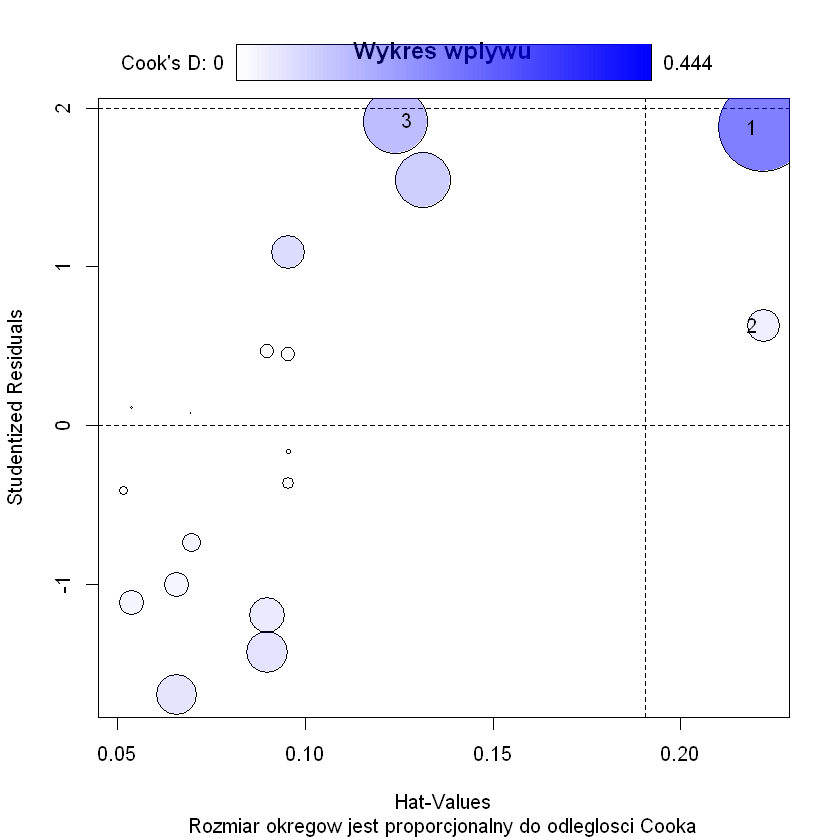

In [243]:
influencePlot (model0, id.method = "identify", id.n = 1, id.cex = 1 , main = "Wykres wplywu",
               sub = "Rozmiar okregow jest proporcjonalny do odleglosci Cooka")

### Interpretacja
- Obserwacje 1,2,3 otrzymały największe odległości Cooka

### ix)
Zdecyduj które z zaznaczonych obserwacji są obserwacjami wpływowymi.

### Interpretacja
- Za poziom krytyczny powyżej którego obserwacja może być uznana za wpływową przyjmuje się 1 lub 4 / n , gdzie n jest liczbą obserwacji.
- 4/21 = 0.190476
- Wpływową obserwacją jest 1 CookD = 0.44361619 > 0.190476

### x)
Zweryfikuj dokonany wybór za pomocą testu influence.measures

In [244]:
influence.measures(model0)

Influence measures of
	 lm(formula = stack.loss ~ Water.Temp) :

    dfb.1_ dfb.Wt.T   dffit cov.r   cook.d    hat inf
1  -0.8120  0.88850  1.0024 1.002 0.443616 0.2221   *
2  -0.2719  0.29756  0.3357 1.372 0.058208 0.2221   *
3  -0.4954  0.56604  0.7213 0.877 0.228024 0.1239    
4  -0.0840  0.10049  0.1466 1.195 0.011205 0.0898    
5   0.0135 -0.02713 -0.0964 1.153 0.004859 0.0517    
6   0.1057 -0.13991 -0.2663 1.070 0.035440 0.0658    
7   0.2579 -0.30853 -0.4500 0.986 0.095958 0.0898    
8   0.2161 -0.25850 -0.3771 1.050 0.069480 0.0898    
9   0.1787 -0.23659 -0.4503 0.886 0.092259 0.0658    
10  0.2842 -0.25073  0.3540 1.084 0.062041 0.0956    
11  0.2842 -0.25073  0.3540 1.084 0.062041 0.0956    
12  0.5280 -0.48072  0.6018 1.000 0.168744 0.1316    
13  0.1170 -0.10323  0.1457 1.205 0.011087 0.0956    
14  0.0140 -0.01167  0.0208 1.197 0.000228 0.0696    
15 -0.0426  0.03756 -0.0530 1.228 0.001482 0.0956    
16 -0.0959  0.08458 -0.1194 1.214 0.007469 0.0956    
17 -0.1359  0.112

### Interpretacja
- Według testu punktami wpływowymi są: 1 oraz 2.

### xi)
Usuń obserwacje wpływowe i ponownie dopasuj model.

In [245]:
model4 = lm(stack.loss[-c(1, 2)]~Water.Temp[-c(1,2)])
summary(model4)


Call:
lm(formula = stack.loss[-c(1, 2)] ~ Water.Temp[-c(1, 2)])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8937 -3.5193 -0.6441  2.8542 11.6072 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -30.846      8.665  -3.560  0.00241 ** 
Water.Temp[-c(1, 2)]    2.250      0.420   5.356 5.24e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.653 on 17 degrees of freedom
Multiple R-squared:  0.6279,	Adjusted R-squared:  0.606 
F-statistic: 28.69 on 1 and 17 DF,  p-value: 5.236e-05


### Interpretacja
- Powstały model bez punktów wpływowych zmniejsza błąd standaryzowany reszt.
- Współczynnik dopasowania $R^2$ spada z 0.75 na 0.6.

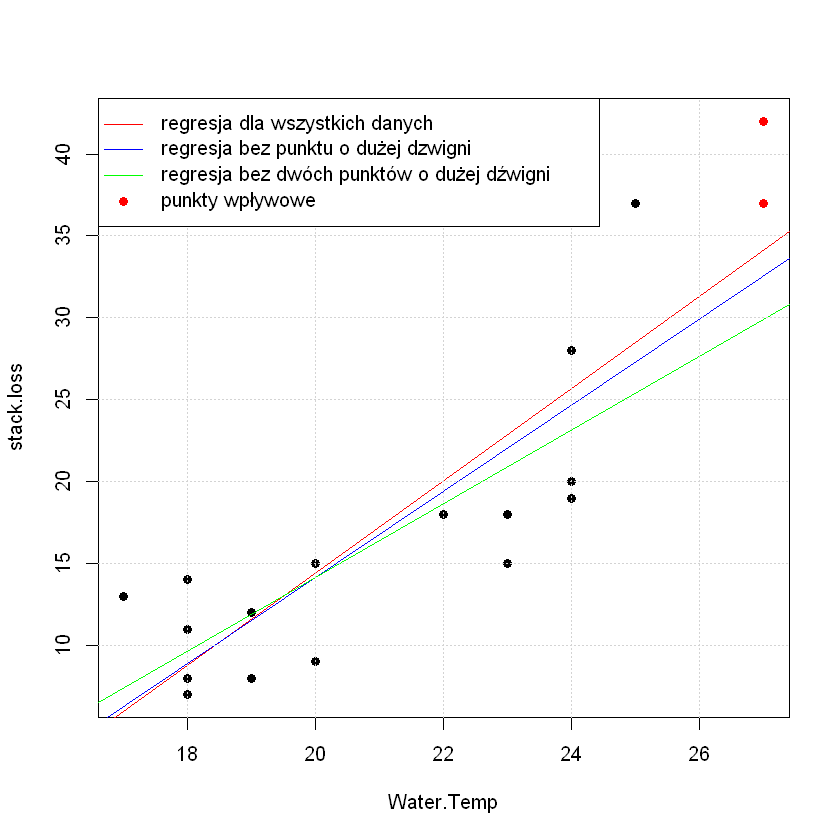

In [246]:
plot(Water.Temp, stack.loss, pch=19)
abline(model0, col="red")
abline(model3, col="blue")
abline(model4, col="green")
points(Water.Temp[c(1, 2)], stack.loss[c(1, 2)], col = "red", pch = 19)
grid()
legend("topleft", c("regresja dla wszystkich danych", 
                    "regresja bez punktu o dużej dzwigni", 
                    "regresja bez dwóch punktów o dużej dźwigni",
                    "punkty wpływowe"), col = c("red", "blue", "green","red"),
                    lty = c(1, 1, 1, NA), pch = c(NA, NA, NA, 19), lwd = c(1, 1, 1, NA))

# Zadanie 4, L2

In [247]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/DANE_predkosc_reakcji.txt")
dane

V1,V2
<int>,<dbl>
15,5.2541984
30,6.7132842
30,11.2666779
4,0.6183255
26,1.7986432
21,6.1584493
19,2.0894321


In [248]:
model_predkosc = lm(dane$V1~dane$V2)
summary(model_predkosc)


Call:
lm(formula = dane$V1 ~ dane$V2)

Residuals:
     1      2      3      4      5      6      7 
-6.393  6.198 -1.317 -9.742 10.310 -1.886  2.830 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  12.7214     5.0330   2.528   0.0527 .
dane$V2       1.6505     0.8498   1.942   0.1098  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.665 on 5 degrees of freedom
Multiple R-squared:   0.43,	Adjusted R-squared:  0.316 
F-statistic: 3.772 on 1 and 5 DF,  p-value: 0.1098


### i)
Przedstaw na wykresie punktowym zależność pomiędzy zmienną Predkosc
i zmienną Koncentracja. Czy zależność ma charakter liniowy?

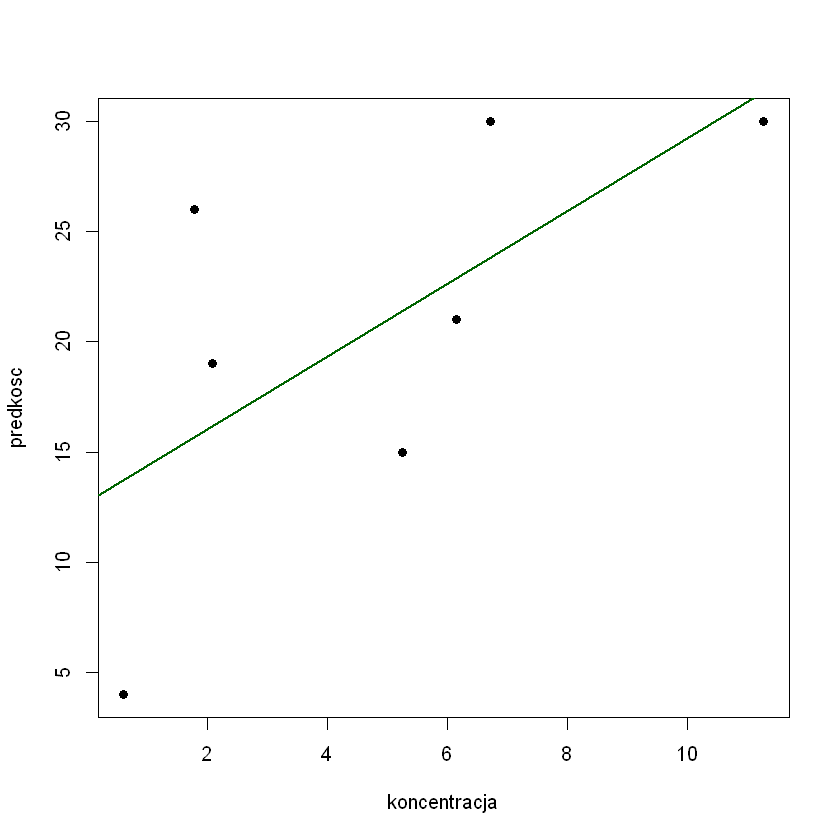

In [249]:
plot(dane$V2, dane$V1, ylab = "predkosc", xlab = "koncentracja", pch = 19)
abline(model_predkosc, col = "darkgreen", lwd = 2)

### Interpretacja
- Zależność nie ma charakteru liniowego.

### ii)
Zastosuj transformację logarytmiczną dla zmiennej Predkosc, dla obu
zmiennych Predkosc i Koncentracja oraz tylko dla zmiennej Koncentracja.
Czy któraś z transformacji prowadzi do uzyskania liniowego charakteru
zależności? Przedstaw odpowiednie wykresy punktowe danych.

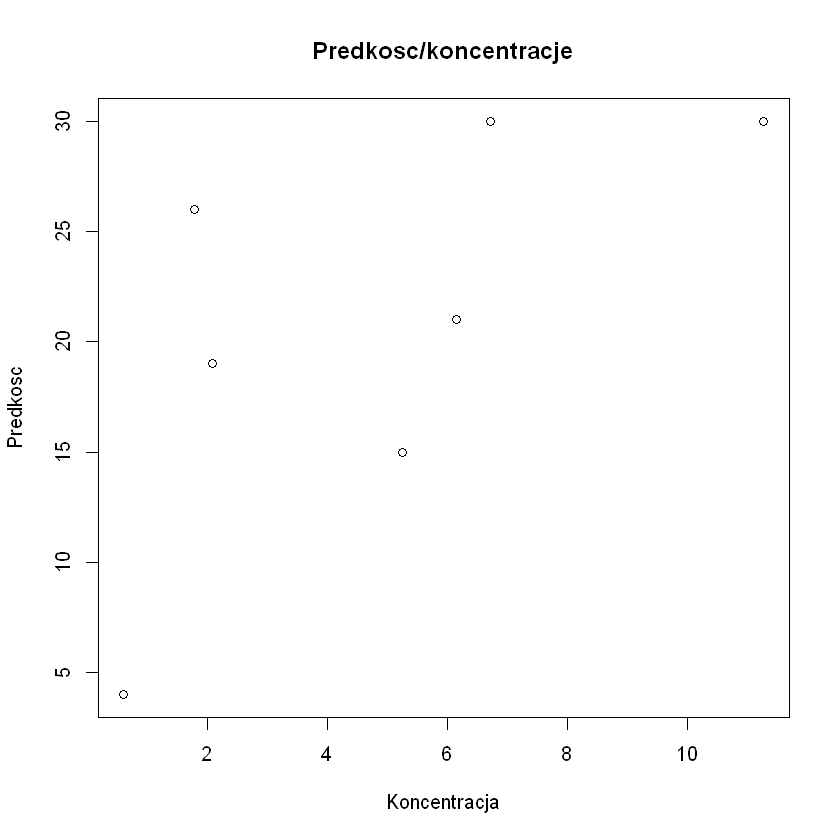

In [250]:
 plot( dane$V1 ~ dane$V2 ,
      main =" Predkosc/koncentracje " , 
      xlab ="Koncentracja" , ylab =" Predkosc ")

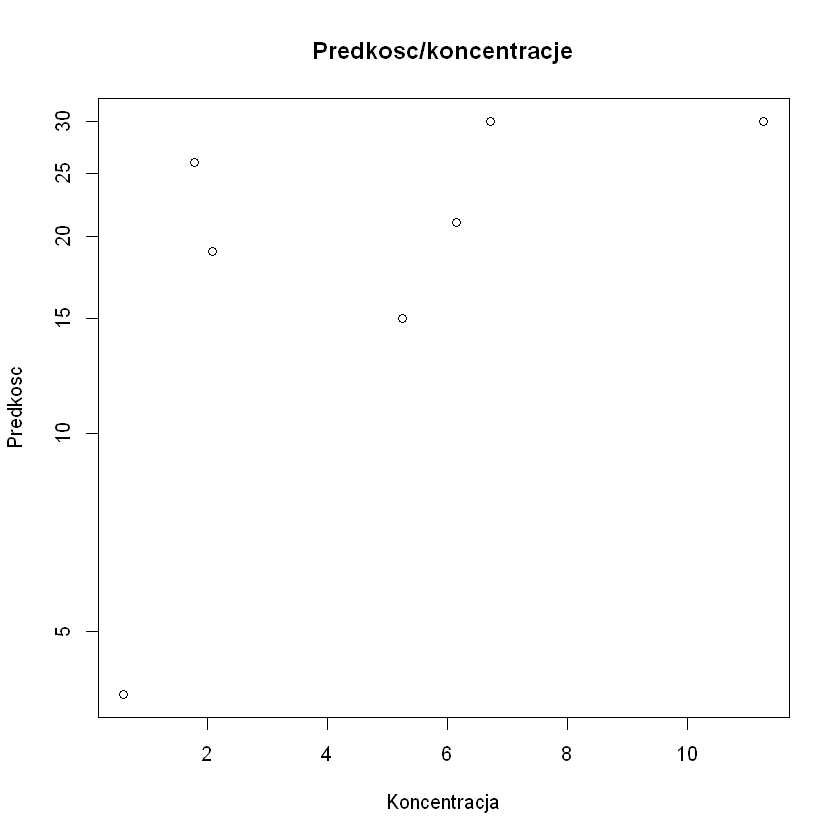

In [251]:
 plot( dane$V1 ~ dane$V2 ,
      main =" Predkosc/koncentracje " , 
      xlab ="Koncentracja" , ylab =" Predkosc " ,log ='y')

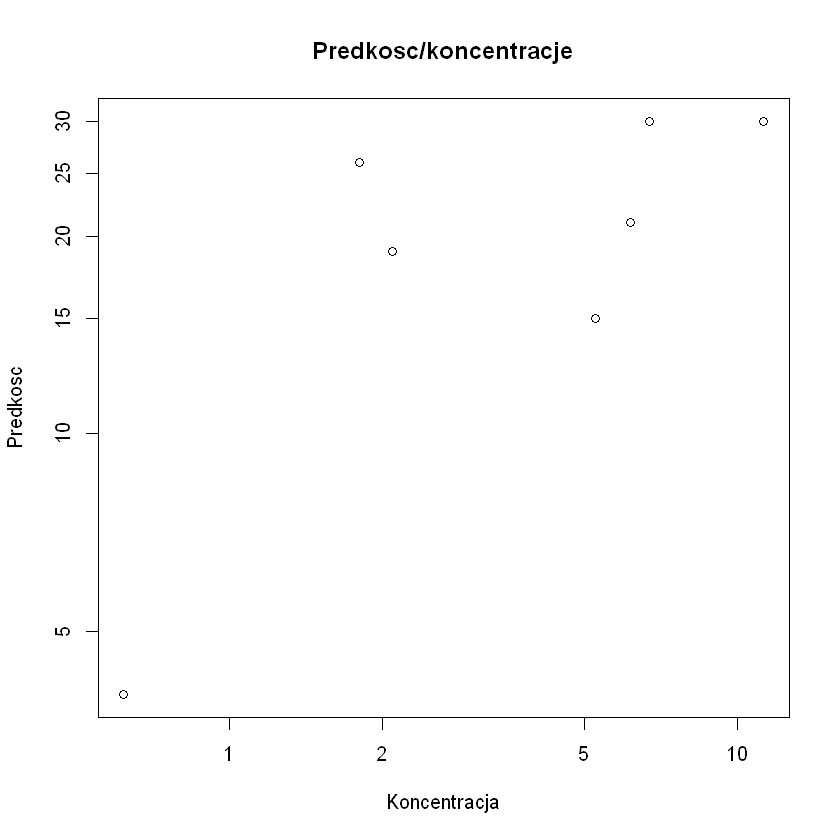

In [252]:
 plot( dane$V1 ~ dane$V2 ,
      main =" Predkosc/koncentracje " , 
      xlab ="Koncentracja" , ylab =" Predkosc " ,log ='xy')

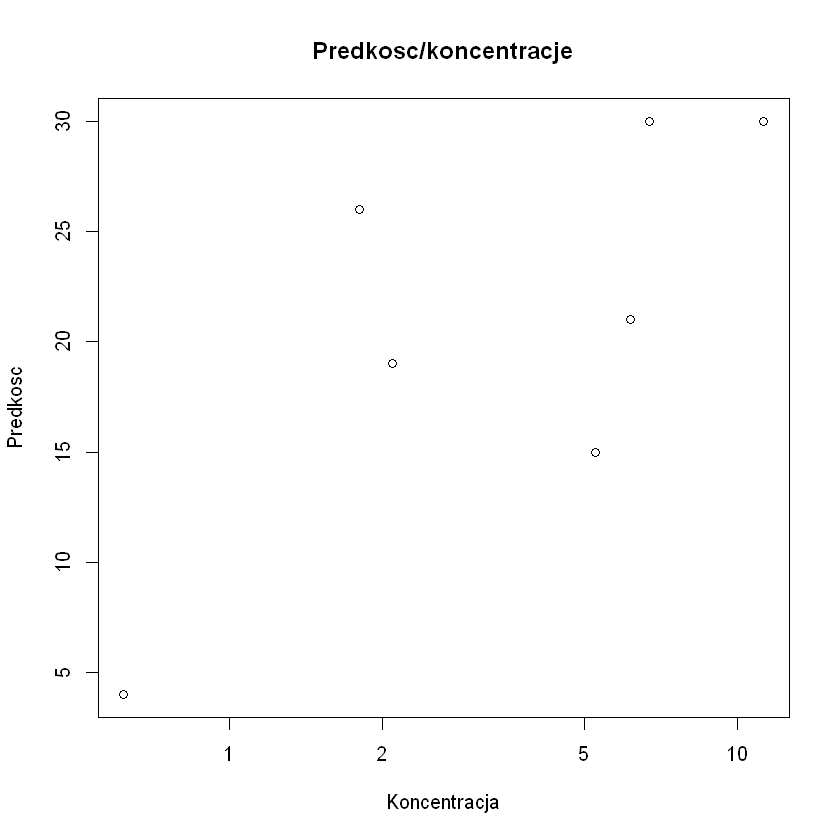

In [253]:
 d<-plot( dane$V1 ~ dane$V2 ,
      main =" Predkosc/koncentracje " , 
      xlab ="Koncentracja" , ylab =" Predkosc " ,log ='x')

### Interpretacja
- Transformacje nie prowadzą do liniowej zależności zmiennych

In [254]:
model_l_1<-lm(log(dane$V1)~dane$V2)
model_l_2<-lm(dane$V1~log(dane$V2))
model_l_3<-lm(log(dane$V1)~log(dane$V2))

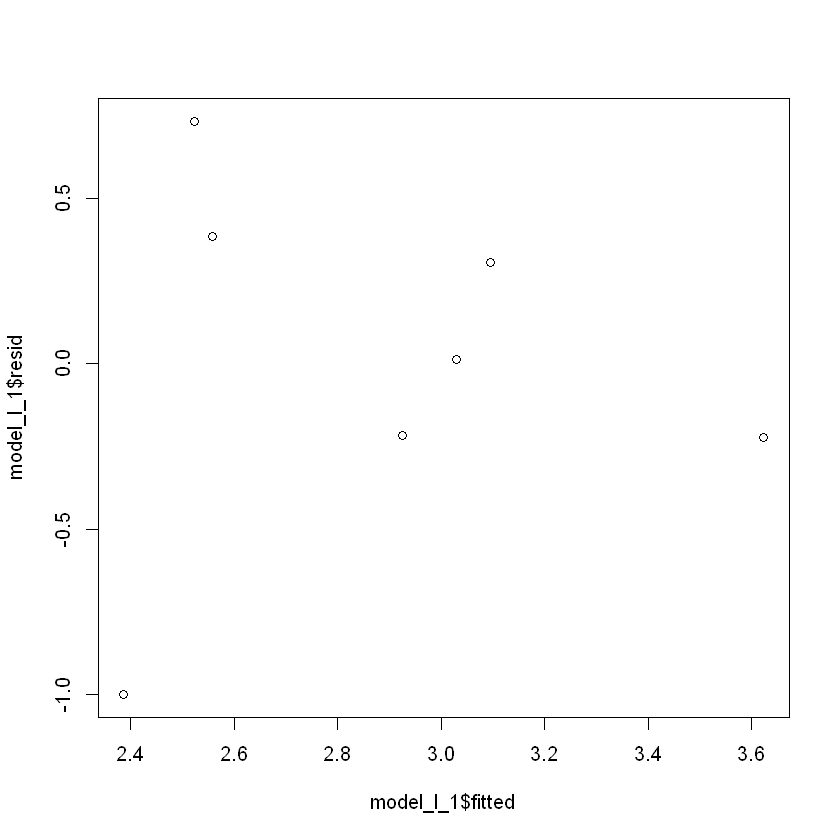

In [255]:
plot(model_l_1$fitted,model_l_1$resid)

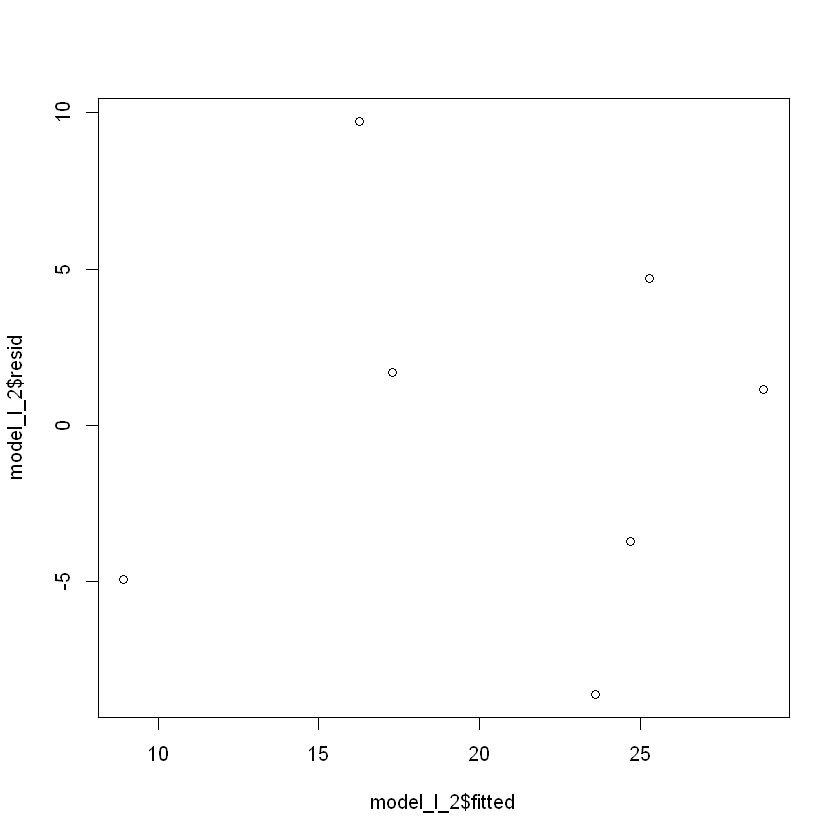

In [256]:
plot(model_l_2$fitted,model_l_2$resid)

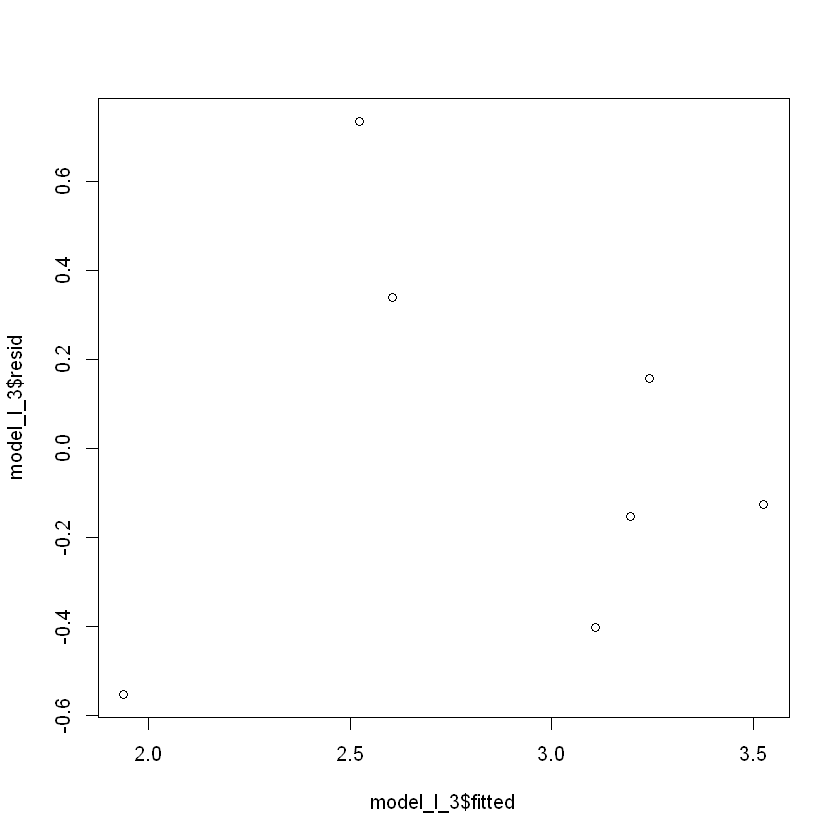

In [257]:
plot(model_l_3$fitted,model_l_3$resid)

### Interpretacja
- Nie wykazuje trendu, rozłożenie jest losowe.
- Sugeruje to poprawność modelu.

### iii)
Dopasuj model wielomianowy stosując wielomian stopnia 2 dla zmiennej Koncentracja, tzn model
Predkosc = β0 + β1 ∗ Koncentracja + β2 ∗ (Koncentracja)2

In [258]:
model_4_3<-lm(dane$V1~dane$V2+I(dane$V2^2))
model_4_3$coef

(Intercept)      dane$V2 I(dane$V2^2) 
 10.69370827   2.77768121  -0.09781834

### Wzor modelu:
$Predkosc = 10.69371+2.77768 \cdot koncentracja -0.09782 \cdot (koncentracja)^2$

### iv)
Przedstaw dopasowaną krzywą na wykresie wraz z danymi. Podsumuj wyniki dopasowanego modelu. Jaki jest współczynnik dopasowania
tego modelu? Czy jest to model właściwy do opisu danych?

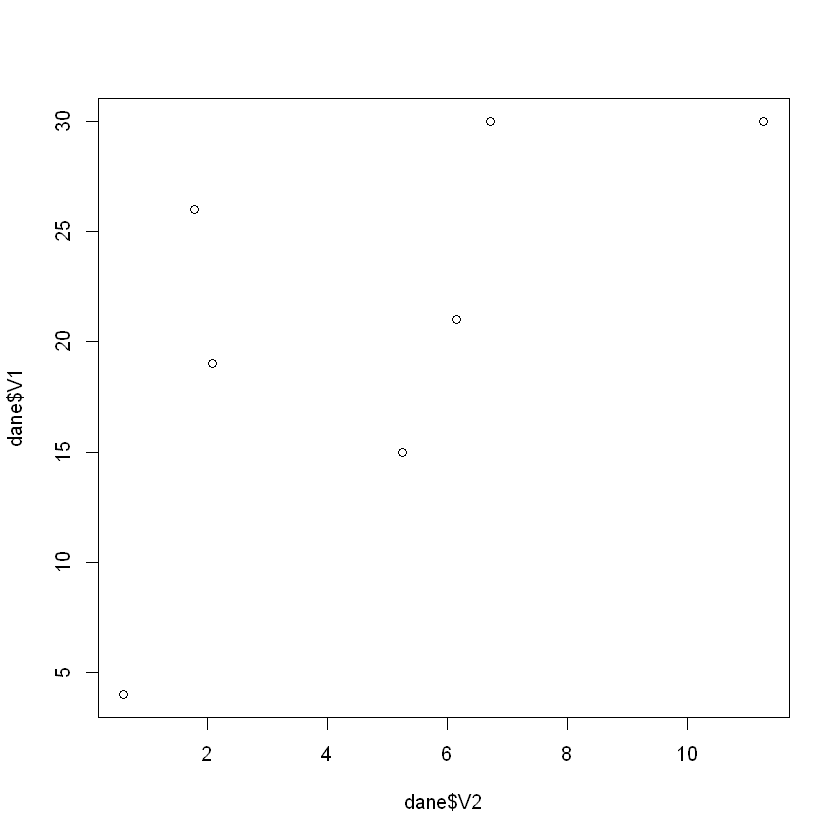

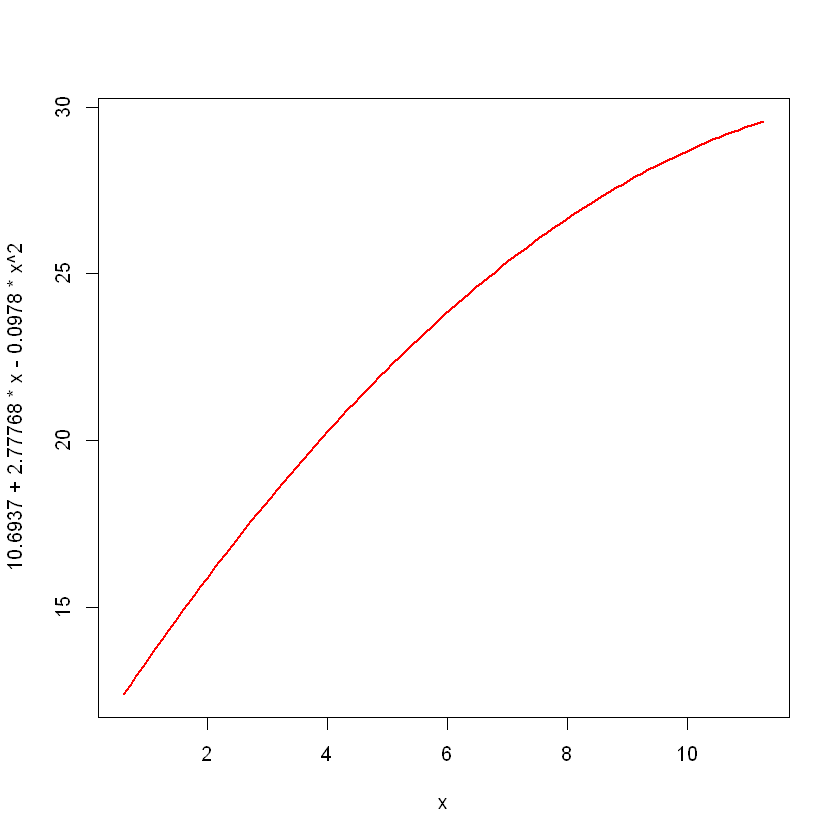

In [259]:
par(mfrow=c(1,1))
plot(dane$V1~dane$V2,pch=1)
curve(10.6937+2.77768*x-0.0978*x^2,add=T,col="red",lwd=2)

In [260]:
summary(model_4_3)


Call:
lm(formula = dane$V1 ~ dane$V2 + I(dane$V2^2))

Residuals:
      1       2       3       4       5       6       7 
-7.5878  5.0674  0.4279 -8.3738 10.6267 -3.0900  2.9296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  10.69371    7.90800   1.352    0.248
dane$V2       2.77768    3.27419   0.848    0.444
I(dane$V2^2) -0.09782    0.27230  -0.359    0.738

Residual standard error: 8.435 on 4 degrees of freedom
Multiple R-squared:  0.4478,	Adjusted R-squared:  0.1717 
F-statistic: 1.622 on 2 and 4 DF,  p-value: 0.3049


### Interpretacja
- Nie ma żadnych obserwacji istotnych statystycznie.
- Współczynnik dopasowania wynosi 0.17.
- Błąd standardowy reszt wynosi  8.44.
- Mówi nam to, że nie jest to właściwy model do opisu danych.

### v)
Dopasuj model wielomianowy stosując wielomian stopnia 6 dla zmiennej ( Koncentracja), tzn model.

In [261]:
model_4_5<-lm(dane$V1~dane$V2+I(dane$V2^2)+
              I(dane$V2^3)+I(dane$V2^4)+I(dane$V2^5)+I(dane$V2^6))
model_4_5$coef

(Intercept)       dane$V2  I(dane$V2^2)  I(dane$V2^3)  I(dane$V2^4) 
-120.76838243  325.45466615 -246.63164345   83.77377432  -14.25726187 
 I(dane$V2^5)  I(dane$V2^6) 
   1.18499405   -0.03784915

### Wzór modelu

$Predkosc = -120.76838+325.45467 \ cdot koncentracja-246.63164 \cdot koncentracja^2+83.77377 \cdot koncentracja^3-14.25726 \cdot koncentracja^4+1.18499 \cdot koncentracja^5-0.03785 \cdot koncentracja^6$

### vi)
Przedstaw dopasowaną krzywą na wykresie wraz z danymi. Podsumuj wyniki dopasowanego modelu. Jaki jest współczynnik dopasowania
tego modelu? Czy jest to model właściwy do opisu danych? Czy jest on dobry dla przewidywania wartości zmiennej Predkosc dla nowych obserwacji?

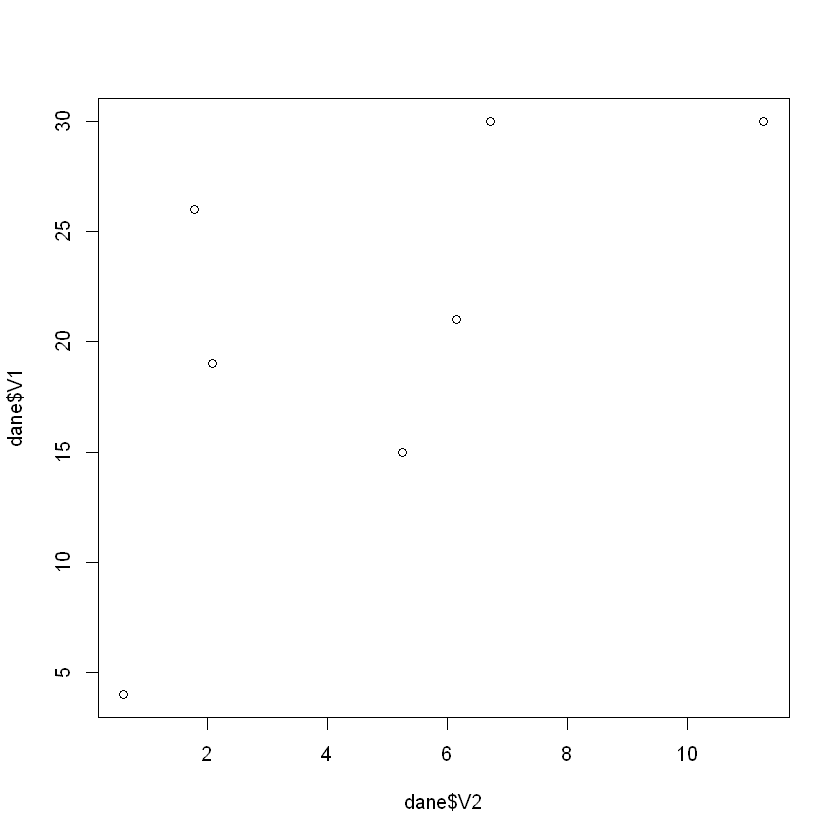

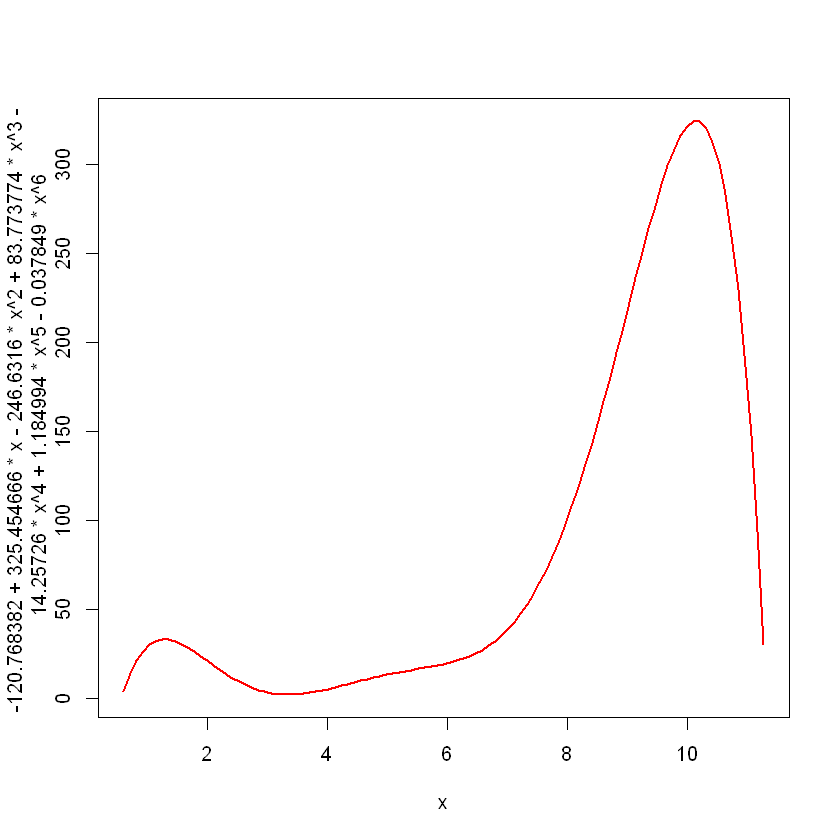

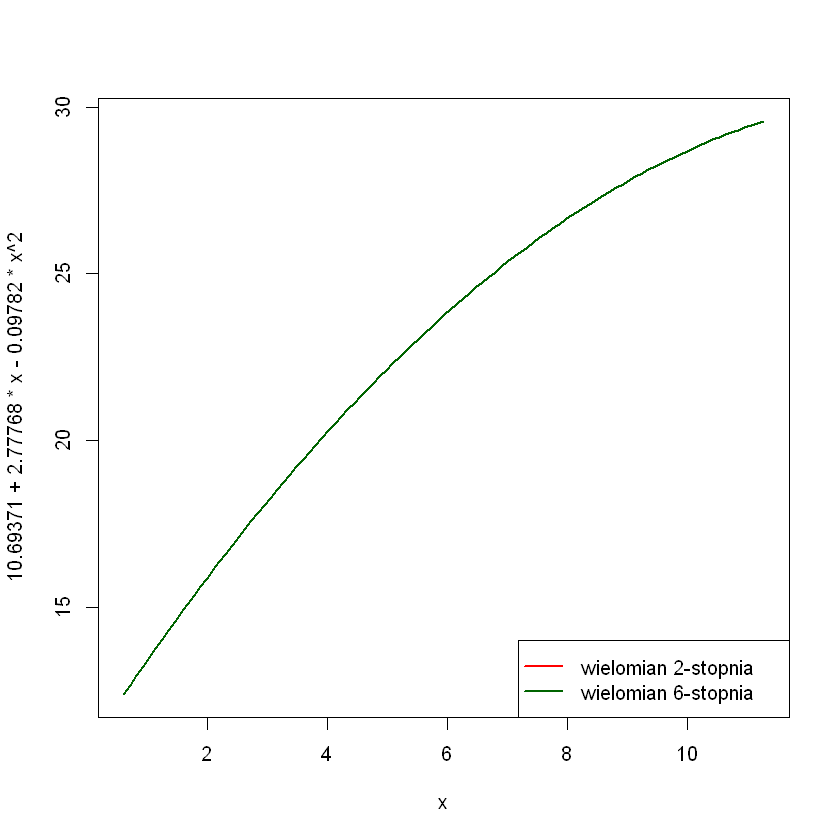

In [262]:
par(mfrow=c(1,1))
plot(dane$V1~dane$V2,pch=1)
curve(-120.768382+325.454666*x-246.6316*x^2+
      83.773774*x^3-14.25726*x^4+1.184994*x^5-0.037849*x^6,add=T,col="red",lwd=2)
curve(10.69371+2.77768*x-0.09782*x^2, add=T, col="darkgreen", lwd=2)
legend("bottomright", c("wielomian 2-stopnia", 
                    "wielomian 6-stopnia"), 
       col = c("red", "darkgreen"),
       lty = c(1, 1), pch = c(NA, NA), lwd = c(2, 2))

In [263]:
summary(model_4_5)


Call:
lm(formula = dane$V1 ~ dane$V2 + I(dane$V2^2) + I(dane$V2^3) + 
    I(dane$V2^4) + I(dane$V2^5) + I(dane$V2^6))

Residuals:
ALL 7 residuals are 0: no residual degrees of freedom!

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)  -120.76838        NaN     NaN      NaN
dane$V2       325.45467        NaN     NaN      NaN
I(dane$V2^2) -246.63164        NaN     NaN      NaN
I(dane$V2^3)   83.77377        NaN     NaN      NaN
I(dane$V2^4)  -14.25726        NaN     NaN      NaN
I(dane$V2^5)    1.18499        NaN     NaN      NaN
I(dane$V2^6)   -0.03785        NaN     NaN      NaN

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 6 and 0 DF,  p-value: NA


### Interpretacja
- Określenie współczynnika dopasowania nie jest możliwe.
- Jest to zły model do opisu danych.
- Wynika to z tego, iż stopień wielomianu jest tylko o 1 mniejszy od liczby punktów.
- Jest to prawie idealne dopasowanie, lecz nie wskazuje znaczącego objaśnienia.

# Lista 3

# Zadanie 5, L3

Dla danych z powyższego ćwiczenia przeprowadź analizę
dyskryminacyjną korzystając z funkcji lda w pakiecie MASS. Prawdopodobieństwa a priori przynależności do klas przyjmij jako równe 0.5.

In [264]:
wino = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/dane_wino.txt",header=FALSE,sep=",")
head(wino)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### i)
Jakie są średnie wartości w grupach?

In [265]:
model_lda = lda(V1 ~ . , data = wino, prior = c(0.33, 0.33,0.34))
model_lda

Call:
lda(V1 ~ ., data = wino, prior = c(0.33, 0.33, 0.34))

Prior probabilities of groups:
   1    2    3 
0.33 0.33 0.34 

Group means:
        V2       V3       V4       V5       V6       V7        V8       V9
1 13.74475 2.010678 2.455593 17.03729 106.3390 2.840169 2.9823729 0.290000
2 12.27873 1.932676 2.244789 20.23803  94.5493 2.258873 2.0808451 0.363662
3 13.15375 3.333750 2.437083 21.41667  99.3125 1.678750 0.7814583 0.447500
       V10      V11       V12      V13       V14
1 1.899322 5.528305 1.0620339 3.157797 1115.7119
2 1.630282 3.086620 1.0562817 2.785352  519.5070
3 1.153542 7.396250 0.6827083 1.683542  629.8958

Coefficients of linear discriminants:
             LD1           LD2
V2  -0.350186614  0.8944964364
V3   0.183338605  0.2948776331
V4  -0.227186803  2.3638133904
V5   0.145705086 -0.1554340461
V6  -0.002187430 -0.0003316757
V7   0.614991949 -0.0693608474
V8  -1.687796495 -0.3911027936
V9  -1.591288242 -1.5379482490
V10  0.115362901 -0.3146029472
V11  0.369656139 

In [266]:
model_lda$means

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,13.74475,2.010678,2.455593,17.03729,106.3390,2.840169,2.9823729,0.290000,1.899322,5.528305,1.0620339,3.157797,1115.7119
2,12.27873,1.932676,2.244789,20.23803,94.5493,2.258873,2.0808451,0.363662,1.630282,3.086620,1.0562817,2.785352,519.5070
3,13.15375,3.333750,2.437083,21.41667,99.3125,1.678750,0.7814583,0.447500,1.153542,7.396250,0.6827083,1.683542,629.8958


### ii)
Jakie są wartości współczynników funkcji dyskryminacyjnych?

In [267]:
model_lda$scaling

,LD1,LD2
V2,-0.350186614,0.8944964364
V3,0.183338605,0.2948776331
V4,-0.227186803,2.3638133904
V5,0.145705086,-0.1554340461
V6,-0.002187430,-0.0003316757
V7,0.614991949,-0.0693608474
V8,-1.687796495,-0.3911027936
V9,-1.591288242,-1.5379482490
V10,0.115362901,-0.3146029472
V11,0.369656139,0.2313972261


### iii)
Dla każdej z funkcji dyskryminacyjnych określ która ze zmiennych objaśniających jest najbardziej istotna.

### Interpretacja
- Dla funkcji dyskryminacyjnej LD1, zmienna V7 jest najbardziej istotna
- Dla funkcji dyskryminacyjnej LD2, zmienna V4 jest najbardziej istotna

### IV)
Jakie są średnie wartości funkcji dyskryminacyjnych w każdej z grup?

In [268]:
LD1 = predict(model_lda)$x 
(LD1_1 = mean(LD1[wino$V1 == 1]))
(LD1_2 = mean(LD1[wino$V1 == 2]))
(LD1_3 = mean(LD1[wino$V1 == 3]))

[1] -1.005044

[1] -1.641044

[1] 2.568262

### V)
Przeprowadź predykcję przynależności do klas na zbiorze testowym.

In [269]:
(pred_lda = predict(model_lda))

,1,2,3
1,1.0000000,2.710371e-09,4.611169e-18
2,0.9999997,2.977518e-07,1.106007e-16
3,0.9999981,1.929016e-06,9.908205e-14
4,1.0000000,3.096621e-12,1.689506e-16
5,0.9369763,6.302343e-02,2.784677e-07
6,1.0000000,2.916457e-11,1.636100e-17
7,1.0000000,2.243841e-11,1.519902e-17
8,1.0000000,1.583667e-10,2.918966e-16
9,1.0000000,4.991425e-08,3.085736e-15
10,0.9999992,8.176372e-07,1.464523e-13


### VI)
Jakie są prawdopodobieństwa przynależności do klas dla dwudziestej obserwacji?

In [270]:
pred_lda$posterior[20,]

1            2            3 
9.999995e-01 5.095511e-07 8.416944e-13

### VII)
Do której z klas zostanie zaklasyfikowana ta obserwacja?

In [271]:
pred_lda$class[20]

[1] 1
Levels: 1 2 3

### VIII)
Wyznacz procent właściwie zaklasyfikowanych obiektów.

In [272]:
sum(pred_lda$class == wino$V1) / nrow(wino) * 100

[1] 100

### IX)
Przedstaw i skomentuj tabelę predykcji.

In [273]:
(T = table(True = wino$V1, Predicted = predict(model_lda)$class))

    Predicted
True  1  2  3
   1 59  0  0
   2  0 71  0
   3  0  0 48

### Interpretacja
- Wszystkie obiekty zostały zaklasyfikowane prawidłowo

# Lista 4

# Zadanie 7, L4

Plik urine.txt zawiera dane dotyczące obecności kryształów oraz innych właściwości moczu.

Dane

* **id** - identyfikator,
* **pres** - obecność kryształów (0- brak, 1- obecność),
* **gravity** - ciężar właściwy,
* **ph** - wartość współczynnika pH,
* **osmo** - osmolarność moczu,
* **conduct** - przewodnictwo,
* **urea** - stężenie mocznika,
* **calc** - stężenie wapnia.

Dla tych danych wykonaj polecenia z powyższego ćwiczenia. Dla wyznaczenia zbioru uczącego wybierz losowo 50 obserwacji ze zbioru danych,
pozostałe traktując jako zbiór testowy.

In [410]:
urine = fread('http://theta.edu.pl/wp-content/uploads/2018/03/urine.csv',quote="")
colnames(urine)<-c('id','pres','gravity','ph','osmo','cond','urea','calc')
head(urine)

id,pres,gravity,ph,osmo,cond,urea,calc
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0,1.021,4.91,725,NA,443,2.45
2,0,1.017,5.74,577,20.0,296,4.49
3,0,1.008,7.20,321,14.9,101,2.36
4,0,1.011,5.51,408,12.6,224,2.15
5,0,1.005,6.52,187,7.5,91,1.16
6,0,1.020,5.27,668,25.3,252,3.34


In [411]:
nrow(urine)

[1] 79

In [412]:
urine=urine[,-1]
urine

pres,gravity,ph,osmo,cond,urea,calc
<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
0,1.021,4.91,725,NA,443,2.45
0,1.017,5.74,577,20.0,296,4.49
0,1.008,7.20,321,14.9,101,2.36
0,1.011,5.51,408,12.6,224,2.15
0,1.005,6.52,187,7.5,91,1.16
0,1.020,5.27,668,25.3,252,3.34
0,1.012,5.62,461,17.4,195,1.40
0,1.029,5.67,1107,35.9,550,8.48
0,1.015,5.41,543,21.9,170,1.16


### i)
Dokonaj podziału obserwacji na podzbiór uczący (pierwsze 324 obserwacje)
oraz zbiór testowy (pozostałe).


In [413]:
uczacy = sample_n(urine, 50)
nrow(uczacy)

[1] 50

In [414]:
testowy = anti_join(urine, uczacy)

Joining with `by = join_by(pres, gravity, ph, osmo, cond, urea, calc)`


 ### ii)
 Dopasuj model regresji logistycznej bazując na podzbiorze uczącym.

In [415]:
model_glm = glm(pres ~ ., data = uczacy, family = binomial())
summary(model_glm)


Call:
glm(formula = pres ~ ., family = binomial(), data = uczacy)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.16803  -0.41173  -0.01616   0.16843   1.91722  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -525.43878  320.16674  -1.641   0.1008  
gravity      532.12782  318.47112   1.671   0.0947 .
ph            -1.41706    1.13265  -1.251   0.2109  
osmo           0.03013    0.02892   1.042   0.2975  
cond          -0.78832    0.47322  -1.666   0.0957 .
urea          -0.05424    0.02907  -1.866   0.0621 .
calc           1.22356    0.49327   2.481   0.0131 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 67.908  on 48  degrees of freedom
Residual deviance: 28.175  on 42  degrees of freedom
  (1 obserwacja została skasowana z uwagi na braki w niej zawarte)
AIC: 42.175

Number of Fisher Scoring iterations: 7


### iii)
Stosując krokową procedurę wyboru modelu zdecyduj, które zmienne powinny pozostać w modelu.

In [416]:
model_krok = glm(pres ~ . -osmo, data = uczacy, family = binomial())
summary(model_krok)


Call:
glm(formula = pres ~ . - osmo, family = binomial(), data = uczacy)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.98060  -0.36707  -0.03525   0.24414   2.01452  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -717.19934  271.88299  -2.638  0.00834 **
gravity      720.51658  271.48618   2.654  0.00796 **
ph            -0.94221    0.98483  -0.957  0.33870   
cond          -0.33342    0.12914  -2.582  0.00983 **
urea          -0.02906    0.01387  -2.095  0.03614 * 
calc           1.07765    0.43568   2.474  0.01338 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 67.908  on 48  degrees of freedom
Residual deviance: 29.352  on 43  degrees of freedom
  (1 obserwacja została skasowana z uwagi na braki w niej zawarte)
AIC: 41.352

Number of Fisher Scoring iterations: 7


In [417]:
model_krok = glm(pres ~ . -ph -osmo , data = uczacy, family = binomial())
summary(model_krok)


Call:
glm(formula = pres ~ . - ph - osmo, family = binomial(), data = uczacy)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.92491  -0.37593  -0.09263   0.27279   2.01210  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -753.65651  278.07378  -2.710  0.00672 **
gravity      750.89637  277.44616   2.706  0.00680 **
cond          -0.30653    0.11669  -2.627  0.00862 **
urea          -0.03136    0.01437  -2.182  0.02911 * 
calc           1.07869    0.43971   2.453  0.01416 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 67.908  on 48  degrees of freedom
Residual deviance: 30.391  on 44  degrees of freedom
  (1 obserwacja została skasowana z uwagi na braki w niej zawarte)
AIC: 40.391

Number of Fisher Scoring iterations: 7


### Interpretacja
- Zmienne istotne statystycznie wpływające na zmienną objaśniającą:
    - gravity
    - calc
    - urea
    - cond

In [284]:
model_4_5<-lm(pres~gravity+I(calc^2), data = uczacy)
model_4_5$coef

(Intercept)       gravity     I(calc^2) 
-21.187313830  21.151013205   0.003686462

### Wzór modelu
$pres = -21.19 + 21.15 \cdot gravity + 0.0037 \cdot calc$

###  iv)
Skonstruuj klasyfikator w oparciu o próbę uczącą. Przedstaw na rysunku klasyfikację dokonaną przez klasyfikator. Wyznacz błąd klasyfikacji na próbie testowej.


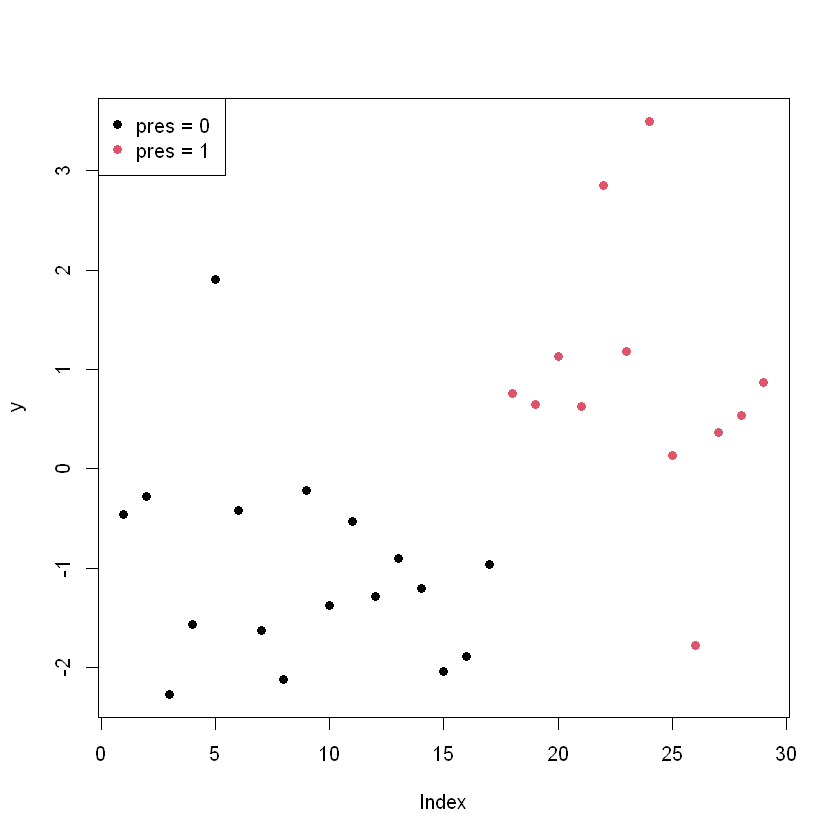

In [285]:
y = predict(model_krok, newdata = testowy)

plot(y, pch = 19, col = testowy$pres + 1)
legend("topleft", c("pres = 0", "pres = 1"), pch = 19, col = c(1, 2))

In [286]:
aggregate(y, by=list(testowy$pres), FUN=mean, na.rm=TRUE)

Group.1,x
<int>,<dbl>
0,-1.0154074
1,0.9018571


In [287]:
pred_values = predict(model_krok, newdata = testowy, type = "response")
pred_values[pred_values < 0.5] = 0
pred_values[pred_values >= 0.5] = 1

(T = table(true = testowy$pres, predicted = pred_values))
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

    predicted
true  0  1
   0 16  1
   1  1 11

[1] 6.896552

In [288]:
blad_predykcji

[1] 6.896552

### Interpretacja
- Błąd wynosi 6.9, 2 obserwacje nie zostały prawidłownie zaklasyfikowane

In [289]:
p = 0.3

pred_values = predict(model_krok, newdata = testowy, type = "response")
pred_values[pred_values < p] = 0
pred_values[pred_values >= p] = 1

(T = table(true = testowy$pres, predicted = pred_values))
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

    predicted
true  0  1
   0 11  6
   1  1 11

[1] 24.13793

### v)
Skonstruuj klasyfikator w oparciu o metodę LDA bazując na próbie uczącej oraz porównaj jego błąd klasyfikacji na próbie testowej z błędem klasyfikacji klasyfikatora opartego na regresji logistycznej.

In [290]:
model_LDA = lda(pres ~ + gravity + calc, data = uczacy)
model_LDA

Call:
lda(pres ~ +gravity + calc, data = uczacy)

Prior probabilities of groups:
   0    1 
0.56 0.44 

Group means:
   gravity     calc
0 1.015179 2.943214
1 1.020636 5.838182

Coefficients of linear discriminants:
               LD1
gravity 88.8318998
calc     0.2245969

In [291]:
pred_values_LDA = predict(model_LDA, newdata= testowy)$class
(T_LDA = table(true = testowy$pres, predicted = pred_values_LDA))
(blad_predykcji_LDA = (1 - sum(diag(T_LDA)) / sum(T_LDA))*100)

    predicted
true  0  1
   0 16  1
   1  1 11

[1] 6.896552

### Interpretacja
- Błąd wynosi 6.9
- Jest taki sam jak w klasyfikacji na podstawie regresji logistycznej

# Zadanie 8, L4

In [292]:
puls = fread('http://theta.edu.pl/wp-content/uploads/2018/03/puls2.csv')
puls$ID <- seq.int(nrow(puls))
head(puls)
nrow(puls)

TetnoSpocz,Palacz,Waga,ID
<chr>,<int>,<int>,<int>
Niskie,1,51,1
Niskie,1,52,2
Niskie,1,57,3
Niskie,1,59,4
Niskie,1,60,5
Niskie,1,66,6


[1] 92

### i)
Dokonaj podziału obserwacji na podzbiór uczący (75% obserwacji, wybranych
w sposób losowy) oraz zbiór testowy (pozostałe).

In [293]:
uczacy = sample_frac(puls, 0.75)

In [294]:
nrow(uczacy)

[1] 69

In [295]:
testowy = anti_join(puls, uczacy, by=c("ID"))

In [296]:
nrow(testowy)

[1] 23

### ii)
Dopasuj model regresji logistycznej bazując na podzbiorze uczącym, przyjmując za zmienną objaśnianą TetnoSpocz

In [297]:
uczacy$TetnoSpocz[uczacy$TetnoSpocz == "Niskie"] <- 0
uczacy$TetnoSpocz[uczacy$TetnoSpocz == "Wysokie"] <- 1

In [298]:
testowy$TetnoSpocz[testowy$TetnoSpocz == "Niskie"] <- 0
testowy$TetnoSpocz[testowy$TetnoSpocz == "Wysokie"] <- 1

In [299]:
uczacy<-uczacy[,-4]
uczacy

TetnoSpocz,Palacz,Waga
<chr>,<int>,<int>
1,1,82
1,0,93
0,0,82
0,0,85
1,0,95
0,1,91
1,0,93
0,0,87
0,0,84


In [300]:
testowy<-testowy[,-4]
testowy

TetnoSpocz,Palacz,Waga
<chr>,<int>,<int>
0,0,68
0,0,68
0,1,68
0,0,69
0,0,79
0,0,82
0,0,82
0,0,84
0,0,85


In [301]:
uczacy$TetnoSpocz<-as.numeric(uczacy$TetnoSpocz)

In [302]:
testowy$TetnoSpocz<-as.numeric(testowy$TetnoSpocz)

In [303]:
str(testowy)

Classes 'data.table' and 'data.frame':	23 obs. of  3 variables:
 $ TetnoSpocz: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Palacz    : int  0 0 1 0 0 0 0 0 0 0 ...
 $ Waga      : int  68 68 68 69 79 82 82 84 85 86 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [304]:
str(uczacy)

Classes 'data.table' and 'data.frame':	69 obs. of  3 variables:
 $ TetnoSpocz: num  1 1 0 0 1 0 1 0 0 0 ...
 $ Palacz    : int  1 0 0 0 0 1 0 0 0 1 ...
 $ Waga      : int  82 93 82 85 95 91 93 87 84 66 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [305]:
model_glm = glm(TetnoSpocz ~ ., data = uczacy, family = binomial())
summary(model_glm)


Call:
glm(formula = TetnoSpocz ~ ., family = binomial(), data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1502  -0.7188  -0.4512   0.3833   3.4551  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.47329    3.36131  -3.711 0.000207 ***
Palacz        0.07272    0.67925   0.107 0.914746    
Waga          0.13556    0.03821   3.548 0.000388 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 60.380  on 66  degrees of freedom
AIC: 66.38

Number of Fisher Scoring iterations: 5


### iii)
Stosując krokową procedurę wyboru modelu zdecyduj, które zmienne powinny pozostać w modelu

In [306]:
model_glm = glm(TetnoSpocz ~ . -Palacz, data = uczacy, family = binomial())
summary(model_glm)


Call:
glm(formula = TetnoSpocz ~ . - Palacz, family = binomial(), data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1295  -0.7264  -0.4410   0.3792   3.4476  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.44417    3.35665  -3.707 0.000209 ***
Waga          0.13550    0.03829   3.539 0.000402 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 60.391  on 67  degrees of freedom
AIC: 64.391

Number of Fisher Scoring iterations: 5


### Interpretacja
- Zmienna istotna statystycznie to waga.

### iv)
Dopasuj model regresji logistycznej bazując na podzbiorze uczącym, uwzględniający interakcję pomiędzy zmiennymi objaśniającymi.

In [307]:
model_inter = glm(TetnoSpocz ~ Palacz + Waga + Palacz*Waga, data = uczacy, family = binomial())
summary(model_inter)


Call:
glm(formula = TetnoSpocz ~ Palacz + Waga + Palacz * Waga, family = binomial(), 
    data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2439  -0.7171  -0.3454   0.4513   3.1713  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -10.37951    3.68422  -2.817  0.00484 **
Palacz       -7.43227    8.68049  -0.856  0.39188   
Waga          0.11162    0.04189   2.665  0.00771 **
Palacz:Waga   0.08582    0.09854   0.871  0.38380   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 59.460  on 65  degrees of freedom
AIC: 67.46

Number of Fisher Scoring iterations: 6


### Interpretacja
- Waga pozostaje istotna statystycznie.

### v)
Przeanalizuj modele zawierające jako zmienne objaśniające następujące zestawy zmiennych:
- M1: Palacz, Waga, Palacz*Waga
- M2: Waga, Palacz*Waga
- M3: Palacz, Palacz*Waga
- M4: Palacz*Waga
- Który z tych modeli zawiera tylko istotne zmienne objaśniające?

In [308]:
model_1 = glm(TetnoSpocz ~ Waga + Palacz:Waga, data = uczacy, family = binomial())
summary(model_1)


Call:
glm(formula = TetnoSpocz ~ Waga + Palacz:Waga, family = binomial(), 
    data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1690  -0.7133  -0.4574   0.3892   3.4550  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.448335   3.342990  -3.724 0.000196 ***
Waga          0.135053   0.038176   3.538 0.000404 ***
Waga:Palacz   0.001526   0.007756   0.197 0.844066    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 60.352  on 66  degrees of freedom
AIC: 66.352

Number of Fisher Scoring iterations: 5


In [309]:
model_2 = glm(TetnoSpocz ~ Palacz + Palacz:Waga, data = uczacy, family = binomial())
summary(model_2)


Call:
glm(formula = TetnoSpocz ~ Palacz + Palacz:Waga, family = binomial(), 
    data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2439  -0.9263  -0.4144   1.1123   1.8985  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.62415    0.31997  -1.951   0.0511 .
Palacz      -17.18763    7.86637  -2.185   0.0289 *
Palacz:Waga   0.19744    0.08919   2.214   0.0269 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 71.767  on 66  degrees of freedom
AIC: 77.767

Number of Fisher Scoring iterations: 6


In [310]:
model_3 = glm(TetnoSpocz ~ Palacz:Waga, data = uczacy, family = binomial())
summary(model_3)


Call:
glm(formula = TetnoSpocz ~ Palacz:Waga, family = binomial(), 
    data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8872  -0.8802  -0.8710   1.4985   1.5186  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.7736852  0.3244220  -2.385   0.0171 *
Palacz:Waga  0.0004885  0.0065453   0.075   0.9405  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 86.381  on 67  degrees of freedom
AIC: 90.381

Number of Fisher Scoring iterations: 4


### Interpretacja
- Model zawierający zmienne Palacz oraz interakcję Palacz:Waga jest wykazuje większą istotność statystyczną niż reszta modeli.

### vi)
Dla pełnego modelu bez interakcji i modelu wskazanego w punkcie (v) skonstruuj klasyfikatory w oparciu o próbę uczącą. Przedstaw na rysunku klasyfikację dokonaną przez oba klasyfikatory. Wyznacz błąd klasyfikacji na próbie testowej.

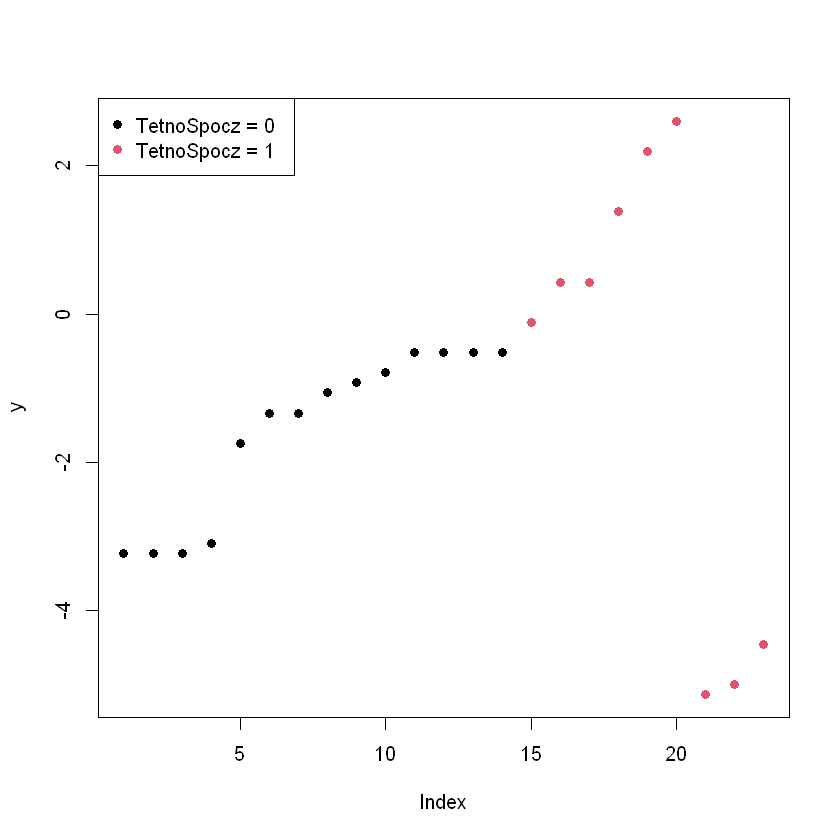

In [311]:
y = predict(model_glm, newdata = testowy)

plot(y, pch = 19, col = testowy$TetnoSpocz + 1)
legend("topleft", c("TetnoSpocz = 0", "TetnoSpocz = 1"), pch = 19, col = c(1, 2))

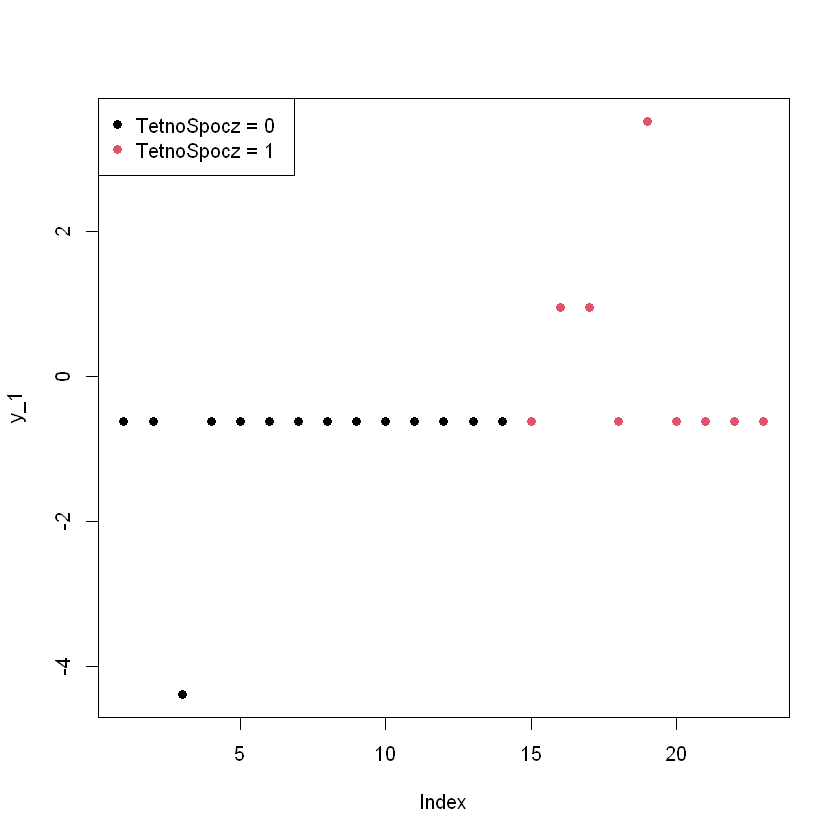

In [312]:
y_1 = predict(model_2, newdata = testowy)

plot(y_1, pch = 19, col = testowy$TetnoSpocz + 1)
legend("topleft", c("TetnoSpocz = 0", "TetnoSpocz = 1"), pch = 19, col = c(1, 2))

In [313]:
pred_values = predict(model_glm, newdata = testowy, type = "response")
pred_values[pred_values < 0.5] = 0
pred_values[pred_values >= 0.5] = 1

(T = table(true = testowy$TetnoSpocz, predicted = pred_values))
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

    predicted
true  0  1
   0 14  0
   1  4  5

[1] 17.3913

### Interpretacja
- Łącznie 4 obserwacje zostały źle zaklasyfikowane.
- Błąd klasyfikacji wynosi 17.39.

In [314]:
p = 0.3

pred_values = predict(model_glm, newdata = testowy, type = "response")
pred_values[pred_values < p] = 0
pred_values[pred_values >= p] = 1

(T = table(true = testowy$TetnoSpocz, predicted = pred_values))
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

    predicted
true 0 1
   0 9 5
   1 3 6

[1] 34.78261

In [315]:
pred_values = predict(model_2, newdata = testowy, type = "response")
pred_values[pred_values < 0.5] = 0
pred_values[pred_values >= 0.5] = 1

(T = table(true = testowy$TetnoSpocz, predicted = pred_values))
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

    predicted
true  0  1
   0 14  0
   1  6  3

[1] 26.08696

### Interpretacja
- Łącznie 6 obserwacje zostały źle zaklasyfikowane.
- Błąd klasyfikacji wynosi 26.09.

In [316]:
p = 0.3

pred_values = predict(model_2, newdata = testowy, type = "response")
pred_values[pred_values < p] = 0
pred_values[pred_values >= p] = 1

(T = table(true = testowy$TetnoSpocz, predicted = pred_values))
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

    predicted
true  0  1
   0  1 13
   1  0  9

[1] 56.52174

### vii)
Skonstruuj klasyfikatory w oparciu o metodę LDA bazując na próbie uczącej oraz porównaj ich błędy klasyfikacji na próbie testowej z błędami klasyfikacji klasyfikatorów opartych na regresji logistycznej. Skomentuj uzyskane wyniki.

In [317]:
model_LDA = lda(TetnoSpocz ~ . -Palacz, data = uczacy)
model_LDA

Call:
lda(TetnoSpocz ~ . - Palacz, data = uczacy)

Prior probabilities of groups:
        0         1 
0.6811594 0.3188406 

Group means:
      Waga
0 77.80851
1 95.00000

Coefficients of linear discriminants:
            LD1
Waga 0.08049156

In [318]:
pred_values_LDA = predict(model_LDA, newdata= testowy)$class
(T_LDA = table(true = testowy$TetnoSpocz, predicted = pred_values_LDA))
(blad_predykcji_LDA = (1 - sum(diag(T_LDA)) / sum(T_LDA))*100)

    predicted
true  0  1
   0 14  0
   1  4  5

[1] 17.3913

# Lista 6

# Zadanie 10, L6

Dla danych z powyższego ćwiczenia przeprowadź analizę
dyskryminacyjną korzystając z funkcji qda w pakiecie MASS. Prawdopodobieństwa a priori przynależności do klas przyjmij jako równe 1/2

In [319]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/dane_kosiarki-1.txt", header = TRUE)
head(dane)
nrow(dane)

,income,lotsize,owner
,<dbl>,<dbl>,<int>
1,20.0,9.2,1
2,28.5,8.4,1
3,21.6,10.8,1
4,20.5,10.4,1
5,29.0,11.8,1
6,36.7,9.6,1


[1] 24

### i)
Jakie są średnie wartości w grupach?

In [320]:
posiada = dane[dane$owner == 1, 1:2]
nie_posiada = dane[dane$owner == 2, 1:2]

In [321]:
(posiada_mean = colMeans(posiada))
(nie_posiada_mean = colMeans(nie_posiada))

income  lotsize 
26.49167 10.13333

income   lotsize 
19.133333  8.816667

### ii)
Przeprowadź predykcję przynależności do klas na zbiorze testowym.

In [322]:
uczacy = sample_frac(dane, 0.75)
nrow(uczacy)

[1] 18

In [323]:
testowy = anti_join(dane, uczacy)
nrow(testowy)

Joining with `by = join_by(income, lotsize, owner)`


[1] 6

In [324]:
model_lda = lda(owner ~., data = testowy , prior = c(0.5,0.5))
model_lda

Call:
lda(owner ~ ., data = testowy, prior = c(0.5, 0.5))

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
  income lotsize
1  33.85    10.0
2  15.70     9.5

Coefficients of linear discriminants:
               LD1
income  -0.2898022
lotsize -0.6272737

In [325]:
pred_lda = predict(model_lda)
pred_lda

$class
[1] 1 1 2 2 2 2
Levels: 1 2

$posterior
             1            2
1 1.000000e+00 7.287148e-09
2 9.999956e-01 4.429255e-06
3 8.989677e-05 9.999101e-01
4 2.543102e-07 9.999997e-01
5 7.128493e-07 9.999993e-01
6 6.391979e-11 1.000000e+00

$x
        LD1
1 -3.361800
2 -2.211747
3  1.671603
4  2.724425
5  2.539495
6  4.211571

### iii)
Jakie są prawdopodobieństwa przynależności do klas dla dziesiątej obserwacji?

In [326]:
model_lda = lda(owner ~., data = dane , prior = c(0.5,0.5))
model_lda

Call:
lda(owner ~ ., data = dane, prior = c(0.5, 0.5))

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
    income   lotsize
1 26.49167 10.133333
2 19.13333  8.816667

Coefficients of linear discriminants:
               LD1
income  -0.1453404
lotsize -0.7590457

In [327]:
pred_lda = predict(model_lda)
pred_lda

,1,2
1,0.217968446,0.78203155
2,0.505507885,0.49449211
3,0.847632493,0.15236751
4,0.680755073,0.31924493
5,0.995976750,0.00402325
6,0.987533203,0.01246680
7,0.948110866,0.05188913
8,0.984456467,0.01554353
9,0.706992840,0.29300716
10,0.980439689,0.01956031


In [328]:
pred_lda$posterior[10,]

1          2 
0.98043969 0.01956031

### iv)
Do której z klas zostanie zaklasyfikowana ta obserwacja?

In [329]:
pred_lda$class[10]

[1] 1
Levels: 1 2

###  v)
Wyznacz procent właściwie zaklasyfikowanych obiektów.

In [330]:
sum(pred_lda$class == dane$owner) / nrow(dane) * 100

[1] 87.5

### vi)
Przedstaw i skomentuj tabelę predykcji.

In [331]:
(T = table(True = dane$owner, Predicted = predict(model_lda)$class))

    Predicted
True  1  2
   1 11  1
   2  2 10

### Interpretacja
- 3 obserwacje zostały nieprawidłowo zaklasyfikowane.
- 12.5% obserwacji zostało źle zaklasyfikowane.

### vii)
Przeprowadź procedurę kroswalidacji dla metody QDA i wyznacz procent właściwie zaklasyfikowanych obiektów oraz tabelę predykcji. Skomentuj uzyskane wyniki porównując z wynikiem uzyskanym w punktach v) i vi).

In [332]:
cross_val <- qda(owner ~ ., data = dane, prior = c(0.5, 0.5), CV = TRUE)
cross_val

$class
 [1] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2
Levels: 1 2

$posterior
             1           2
1  0.106432356 0.893567644
2  0.396327871 0.603672129
3  0.782954490 0.217045510
4  0.605425940 0.394574060
5  0.972830795 0.027169205
6  0.995511522 0.004488478
7  0.980112500 0.019887500
8  0.969145642 0.030854358
9  0.634519059 0.365480941
10 0.980867414 0.019132586
11 0.565680501 0.434319499
12 0.869669231 0.130330769
13 0.826312929 0.173687071
14 0.586217945 0.413782055
15 0.122824394 0.877175606
16 0.388506209 0.611493791
17 0.853427940 0.146572060
18 0.025111983 0.974888017
19 0.310342950 0.689657050
20 0.012526677 0.987473323
21 0.106420218 0.893579782
22 0.002905678 0.997094322
23 0.044816177 0.955183823
24 0.014085943 0.985914057

$terms
owner ~ income + lotsize
attr(,"variables")
list(owner, income, lotsize)
attr(,"factors")
        income lotsize
owner        0       0
income       1       0
lotsize      0       1
attr(,"term.labels")
[1] "income"  "lotsize"
attr(,

In [333]:
tabela = table(dane$owner, cross_val$class, dnn=c("True","Predicted"))
tabela
blad = (tabela[1,2] + tabela[2,1]) / (sum(tabela)) * 100
100 - blad
blad

    Predicted
True  1  2
   1 10  2
   2  3  9

[1] 79.16667

[1] 20.83333

### Interpretacja
- Metoda LDA dopasowała obserwacje lepiej niż metoda QDA.
- Metoda LDA osiągnęła 87.5% poprawności, a metoda QDA 79.17%.

### viii)
Jak zostanie zaklasyfikowana nowa obserwacja o wartościach X1 = 100, X2 = 22.5? Co to oznacza?

In [334]:
dane

income,lotsize,owner
<dbl>,<dbl>,<int>
20.0,9.2,1
28.5,8.4,1
21.6,10.8,1
20.5,10.4,1
29.0,11.8,1
36.7,9.6,1
36.0,8.8,1
27.6,11.2,1
23.0,10.0,1


In [335]:
new_data <- data.frame(income = c(100), lotsize = c(22.5))

In [336]:
predicted_classes <- predict(model_lda, newdata = new_data)
predicted_classes

$class
[1] 1
Levels: 1 2

$posterior
  1            2
1 1 1.089235e-19

$x
        LD1
1 -21.10503

### ix)
Porównaj błędy klasyfikacji i tabele klasyfikacji dla metod LDA i QDA z zastosowaniem 10-krotnej kroswalidacji.

In [337]:
mypredict.lda <- function ( object , newdata ){
    predict ( object , newdata = newdata )$ class
}

In [338]:
mypredict.qda <- function ( object , newdata ){
    predict ( object , newdata = newdata )$ class
}

In [339]:
dane$owner=as.factor(dane$owner)

In [340]:
(cross_val_10_qda = errorest(owner ~ ., data = dane, model = qda , estimator = "cv" , predict= mypredict.qda))


Call:
errorest.data.frame(formula = owner ~ ., data = dane, model = qda, 
    predict = mypredict.qda, estimator = "cv")

	 10-fold cross-validation estimator of misclassification error 

Misclassification error:  0.1667 


In [341]:
(cross_val_10_lda = errorest(owner ~ ., data = dane, model = lda , estimator = "cv" , predict= mypredict.lda))


Call:
errorest.data.frame(formula = owner ~ ., data = dane, model = lda, 
    predict = mypredict.lda, estimator = "cv")

	 10-fold cross-validation estimator of misclassification error 

Misclassification error:  0.2083 


### x)
Wyznacz krzywe ROC dla metod LDA i QDA dla klasyfikacji osób posiadających oraz nie posiadających kosiarki. Jak zinterpretujesz uzyskane krzywe?

In [342]:
(posiada_mean = colMeans(posiada))
(nie_posiada_mean = colMeans(nie_posiada))

(S1 = cov(posiada))
(S2 = cov(nie_posiada))

income  lotsize 
26.49167 10.13333

income   lotsize 
19.133333  8.816667

,income,lotsize
income,39.182652,-1.969697
lotsize,-1.969697,1.020606


,income,lotsize
income,22.3006061,-0.4315152
lotsize,-0.4315152,1.1160606


In [343]:
(invS1 = solve(S1))
invS2 = solve(S2)

pi1 = pi2 = 0.5

,income,lotsize
income,0.02826354,0.05454661
lotsize,0.05454661,1.08508105


In [344]:
k = .5*log(det(S1) / det(S2)) + .5*(t(posiada_mean)%*%invS1%*%posiada_mean 
                                    - t(nie_posiada_mean)%*%invS2%*%nie_posiada_mean)
k

34.15698


In [345]:
min_x = min(c(posiada$income, nie_posiada$income))
min_y = min(c(posiada$lotsize, nie_posiada$lotsize))

max_x = max(c(posiada$income, nie_posiada$income))
max_y = max(c(posiada$lotsize, nie_posiada$lotsize))

In [346]:
x = seq(min_x, max_x, length = 100)
y = seq(min_y, max_y, length = 100)

X = as.data.frame(cbind(x, y))
colnames(X) = c("income", "lotsize")

head(X)

,income,lotsize
,<dbl>,<dbl>
1,11.00000,7.000000
2,11.25960,7.048485
3,11.51919,7.096970
4,11.77879,7.145455
5,12.03838,7.193939
6,12.29798,7.242424


In [347]:
np=1000
x = seq(min_x, max_x, length.out = np)
y = seq(min_y, max_y, length.out = np)
nd = expand.grid(x,y)
head(nd)
dim(nd)

,Var1,Var2
,<dbl>,<dbl>
1,11.00000,7
2,11.02573,7
3,11.05145,7
4,11.07718,7
5,11.10290,7
6,11.12863,7


[1] 1000000       2

In [348]:
fun_disk = function(X, pi1, pi2, m1, m2, S1, S2) {
    X = as.matrix(X, 1, 2)
    invS1 = solve(S1)
    invS2 = solve(S2)
    k = .5*log(det(S1) / det(S2)) + .5*(t(m1)%*%invS1%*%m1 - 
                                        t(m2)%*%invS2%*%m2)
    fun = log(pi2 / pi1) + X%*%(invS2%*%m2 - invS1%*%m1) -
          .5*X%*%(invS2 - invS1)%*%t(X) + k
    return(fun)
}

In [349]:
fun_disk(X[1,], pi1, pi2, posiada_mean, nie_posiada_mean, S1, S2)

1,8.31347


In [350]:
q = numeric(dim(nd)[1])
for (i in 1:dim(nd)[1]) {
 q[i] = fun_disk(as.matrix(nd[i,]), pi1, pi2, posiada_mean, nie_posiada_mean, S1, S2)
}

In [351]:
head(q)
tail(q)

[1] 8.313470 8.308073 8.302665 8.297246 8.291816 8.286374

[1] -7.746404 -7.758350 -7.770308 -7.782277 -7.794257 -7.806249

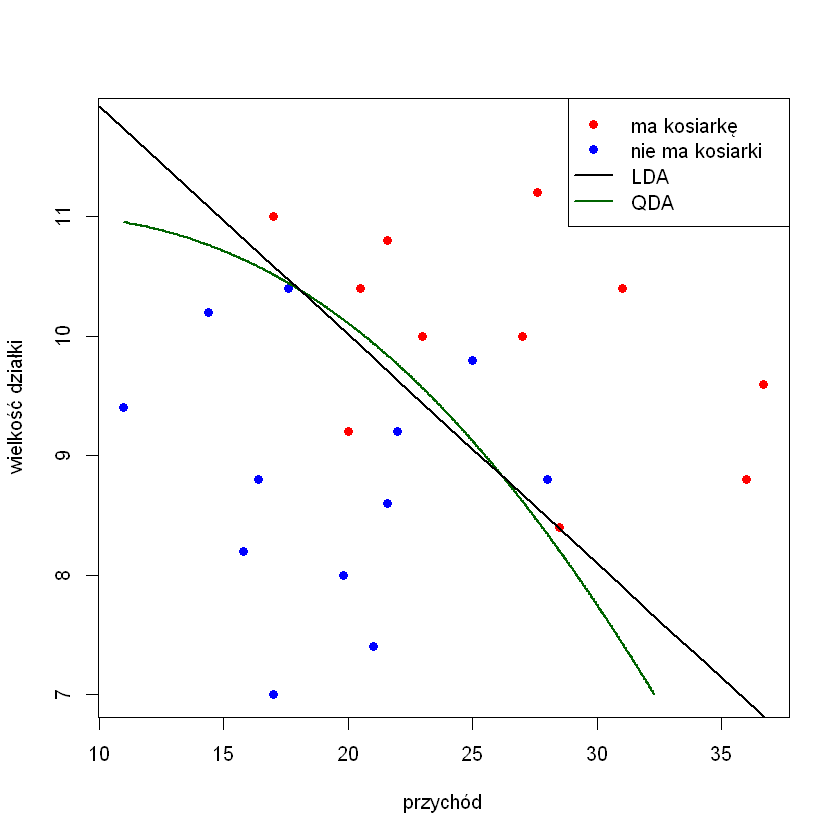

In [352]:
q2 = q
q2[q2 > 0] = 2
q2[q2 <=0] = 1

plot(posiada$income, posiada$lotsize, type = "p", 
     pch = 19, col = "red", xlab = "przychód", 
     ylab = "wielkość działki", xlim = c(min_x, max_x), 
     ylim = c(min_y, max_y))
points(nie_posiada$income, nie_posiada$lotsize, pch = 19, col = "blue")

contour(x, y, z = matrix(q2, nrow = np, ncol = np), 
        levels = c(1,2), add = TRUE, drawlabels = FALSE, 
        col='darkgreen', lwd = 2)
lines(10:40,21.73876/1.570369-0.3006909/1.570369*10:40,
      col='black', lwd = 2)
legend("topright", c("ma kosiarkę", "nie ma kosiarki", "LDA", "QDA"),
      col = c("red", "blue", "black", "darkgreen"), 
      pch = c(19, 19, NA, NA), lty = c(NA, NA, 1, 1), 
      lwd = c(1, 1, 2, 2))

# Zadanie 11, L6
W pakiecie MASS znajdują się dane Pima.te. Zapoznaj
się z zawartością tego zbioru danych. Dla zmiennej objaśnianej przeprowadź
analizę metodą LDA i QDA. Porównaj proporcje błędnych klasyfikacji dokonane przez te dwie metody. Wyznacz i porównaj ze sobą błędy dla tych
metod uzyskane przy zastosowaniu procedury kroswalidacji i metody bootstrap. Wylicz średnie wartości czułości i specyficzności dla LDA i QDA.
Jak zinterpretujesz te wyniki? Wyznacz krzywe ROC dla LDA i QDA dla
klasyfikacji osób chorych oraz dla klasyfikacji osób zdrowych. Która z metod
działa lepiej?


In [353]:
data(Pima.te)
head(Pima.te)

,npreg,glu,bp,skin,bmi,ped,age,type
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,33.6,0.627,50,Yes
2,1,85,66,29,26.6,0.351,31,No
3,1,89,66,23,28.1,0.167,21,No
4,3,78,50,32,31.0,0.248,26,Yes
5,2,197,70,45,30.5,0.158,53,Yes
6,5,166,72,19,25.8,0.587,51,Yes


In [354]:
Pima.te_yes = Pima.te[Pima.te$type == "Yes", 1:7]
Pima.te_no = Pima.te[Pima.te$type == "No", 1:7]
head(Pima.te_yes)
head(Pima.te_no)

,npreg,glu,bp,skin,bmi,ped,age
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,6,148,72,35,33.6,0.627,50
4,3,78,50,32,31.0,0.248,26
5,2,197,70,45,30.5,0.158,53
6,5,166,72,19,25.8,0.587,51
7,0,118,84,47,45.8,0.551,31
10,9,119,80,35,29.0,0.263,29


,npreg,glu,bp,skin,bmi,ped,age
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
2,1,85,66,29,26.6,0.351,31
3,1,89,66,23,28.1,0.167,21
8,1,103,30,38,43.3,0.183,33
9,3,126,88,41,39.3,0.704,27
11,1,97,66,15,23.2,0.487,22
12,5,109,75,26,36.0,0.546,60


In [355]:
model_lda1 = lda(type ~ ., data =Pima.te, prior = c(0.5, 0.5))
model_lda1

Call:
lda(type ~ ., data = Pima.te, prior = c(0.5, 0.5))

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
       npreg      glu       bp     skin      bmi       ped      age
No  2.932735 108.1883 70.13004 27.34081 31.63991 0.4645650 29.21525
Yes 4.614679 141.9083 74.77064 32.88991 36.51284 0.6589633 35.61468

Coefficients of linear discriminants:
               LD1
npreg  0.099984437
glu    0.028389957
bp    -0.004602843
skin   0.004726554
bmi    0.052002256
ped    0.615724201
age    0.012235784

In [356]:
(T1 = table(True = Pima.te$type, Predicted = predict(model_lda1)$class))
(T1[1,2] + T1[2,1]) / sum(T1) * 100

     Predicted
True   No Yes
  No  183  40
  Yes  28  81

[1] 20.48193

In [357]:
model_qda1 <- qda(type ~ ., data =Pima.te, prior = c(0.5, 0.5))
model_qda1

Call:
qda(type ~ ., data = Pima.te, prior = c(0.5, 0.5))

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
       npreg      glu       bp     skin      bmi       ped      age
No  2.932735 108.1883 70.13004 27.34081 31.63991 0.4645650 29.21525
Yes 4.614679 141.9083 74.77064 32.88991 36.51284 0.6589633 35.61468

In [358]:
(T2 = table(True = Pima.te$type, Predicted = predict(model_qda1)$class))
(T2[1,2] + T2[2,1]) / sum(T2) * 100

     Predicted
True   No Yes
  No  179  44
  Yes  26  83

[1] 21.08434

### Interpretacja
- Przy metodzie LDA błąd klasyfikacji wynosi 20.48 co jest lepszym wynikiem niż w przypadku metody QDA, w której błąd wynosi 21.08.

In [359]:
cross_val_lda = lda(type ~ ., data =Pima.te, prior = c(0.5, 0.5), CV=TRUE)
cross_val_lda

$class
  [1] Yes No  No  No  Yes Yes No  No  Yes No  No  Yes No  Yes No  Yes No  Yes
 [19] Yes No  Yes Yes No  No  No  No  Yes No  No  No  No  No  Yes No  No  No 
 [37] No  No  No  No  Yes No  Yes No  No  No  No  Yes No  No  Yes No  Yes No 
 [55] Yes No  No  No  Yes Yes No  No  No  No  No  No  No  Yes Yes Yes No  Yes
 [73] Yes No  No  No  No  Yes Yes No  No  No  No  No  No  Yes No  Yes No  No 
 [91] No  Yes No  No  Yes Yes No  Yes No  Yes Yes No  No  Yes Yes Yes Yes Yes
[109] No  No  No  No  Yes No  No  Yes Yes No  No  No  No  No  Yes Yes Yes No 
[127] No  No  Yes No  No  Yes No  Yes No  No  Yes No  Yes No  Yes No  No  No 
[145] No  No  Yes No  No  No  No  Yes No  No  No  Yes Yes No  Yes No  No  Yes
[163] No  No  No  No  No  No  No  No  No  Yes No  No  Yes No  Yes Yes No  Yes
[181] No  No  Yes Yes Yes No  Yes No  No  Yes Yes No  No  No  No  Yes No  Yes
[199] No  No  No  No  Yes No  No  No  No  No  Yes No  Yes Yes No  No  Yes Yes
[217] Yes No  No  No  Yes No  Yes No  No  No  No  No  No 

In [360]:
(T1CV = table(Pima.te$type, cross_val_lda$class,dnn=c("True","Predicted")))
(T1CV[1,2] + T1CV[2,1]) / sum(T1CV) * 100

     Predicted
True   No Yes
  No  181  42
  Yes  32  77

[1] 22.28916

In [361]:
cross_val_qda <- qda(type ~ ., data =Pima.te, prior = c(0.5, 0.5), CV = TRUE)
cross_val_qda

$class
  [1] Yes No  No  No  Yes Yes Yes Yes No  Yes No  Yes No  Yes No  No  No  No 
 [19] Yes No  Yes Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [37] No  No  No  No  Yes No  Yes No  Yes No  No  No  No  No  Yes No  Yes No 
 [55] Yes No  No  No  Yes Yes No  No  No  No  No  Yes No  Yes Yes Yes No  Yes
 [73] Yes No  No  No  No  Yes Yes Yes Yes Yes No  No  No  Yes No  Yes No  No 
 [91] No  Yes No  No  Yes Yes No  Yes No  Yes Yes No  No  No  Yes Yes Yes Yes
[109] No  No  No  No  Yes No  No  Yes Yes No  Yes No  No  No  Yes Yes Yes No 
[127] No  No  Yes No  No  No  No  Yes No  No  No  No  Yes No  Yes No  Yes No 
[145] No  No  Yes No  No  No  No  Yes No  No  No  Yes Yes Yes Yes No  No  Yes
[163] No  No  No  Yes No  No  No  No  No  Yes No  No  Yes No  Yes No  No  Yes
[181] No  No  Yes Yes Yes No  No  No  No  Yes Yes No  No  No  No  Yes No  Yes
[199] No  No  No  No  Yes Yes Yes No  No  No  Yes No  Yes Yes No  No  Yes Yes
[217] Yes No  No  No  No  No  Yes No  No  No  No  Yes No 

In [362]:
(T2CV = table(Pima.te$type, cross_val_qda$class,dnn=c("True","Predicted")))
(T2CV[1,2] + T2CV[2,1]) / sum(T2CV) * 100

     Predicted
True   No Yes
  No  174  49
  Yes  32  77

[1] 24.39759

### Interpretacja
- Błąd klasyfikacji po kroswalidacji wzrósł w obu przypadkach.
- W metodzie LDA wynosi 22.29.
- W metodzie QDA wynosi 24.40.

In [363]:
mypredict.lda <- function(object, newdata){
predict(object, newdata)$class
}

In [364]:
mypredict.qda <- function(object, newdata){
predict(object, newdata)$class
}


In [365]:
errorest(type ~ ., data = Pima.te, modeltype = "class" , model = lda, estimator = "boot", predict= mypredict.lda)


Call:
errorest.data.frame(formula = type ~ ., data = Pima.te, model = lda, 
    predict = mypredict.lda, estimator = "boot", modeltype = "class")

	 Bootstrap estimator of misclassification error 
	 with 25 bootstrap replications

Misclassification error:  0.2257 
Standard deviation: 0.0041 


In [366]:
errorest(type ~ ., data = Pima.te, modeltype = "class" , model = lda, estimator = "cv", predict= mypredict.lda)


Call:
errorest.data.frame(formula = type ~ ., data = Pima.te, model = lda, 
    predict = mypredict.lda, estimator = "cv", modeltype = "class")

	 10-fold cross-validation estimator of misclassification error 

Misclassification error:  0.2199 


In [367]:
errorest(type ~ ., data = Pima.te, modeltype = "class" , model = qda, estimator = "boot", predict= mypredict.qda)


Call:
errorest.data.frame(formula = type ~ ., data = Pima.te, model = qda, 
    predict = mypredict.qda, estimator = "boot", modeltype = "class")

	 Bootstrap estimator of misclassification error 
	 with 25 bootstrap replications

Misclassification error:  0.2319 
Standard deviation: 0.0049 


In [368]:
errorest(type ~ ., data = Pima.te, modeltype = "class" , model = qda, estimator = "cv", predict= mypredict.qda)


Call:
errorest.data.frame(formula = type ~ ., data = Pima.te, model = qda, 
    predict = mypredict.qda, estimator = "cv", modeltype = "class")

	 10-fold cross-validation estimator of misclassification error 

Misclassification error:  0.2229 


In [369]:
0.2421-0.2349

[1] 0.0072

### Interpretacja
- W metodzie LDA wystąpiła minimalna różnica między błędami, estymator "cv" miał mniejszy błąd.
- W metodzie QDA wystąpiła różnica: 0.0072, estymator "cv" miał mniejszy błąd.

In [370]:
(czuloscLDA = T1[2,2] / (T1[2,2] + T1[1,2]) )

[1] 0.6694215

In [371]:
(czuloscQDA = T2[2,2] / (T2[2,2] + T2[1,2]))

[1] 0.6535433

In [372]:
(specLDA = T1[1,1] / (T1[1,1] + T1[2,1]) )

[1] 0.8672986

In [373]:
(specQDA = T2[1,1] / (T2[1,1] + T2[2,1]))

[1] 0.8731707

### Interpretacja
- Czułość testu dla metody LDA wynosi 0.669.
- Czułość testu dla metody QDA wynosi 0.654.
- Obie metody mają podobną czułość.
- Specyficzność testu dla metody LDA wynosi 0.867.
- Specyficzność testu dla metody QDA wynosi 0.873.
- Obie metody mają małą różnicę.
- Aby polepszyć nasz model należałoby zwiększyć czułość oraz zmniejszyć specyficzność.

In [374]:
(m1.te = colMeans(Pima.te_yes))
m2.te = colMeans(Pima.te_no)

(S1.te = cov(Pima.te_yes))
S2.te = cov(Pima.te_no)

npreg         glu          bp        skin         bmi         ped 
  4.6146789 141.9082569  74.7706422  32.8899083  36.5128440   0.6589633 
        age 
 35.6146789

,npreg,glu,bp,skin,bmi,ped,age
npreg,15.2205233,-11.276419,6.0311757,-6.4502209,-6.785746,-0.0618476,24.5538566
glu,-11.2764186,1026.287802,39.0343187,-3.7601937,12.702115,0.5651170,17.9365443
bp,6.0311757,39.034319,172.3450561,7.9282195,26.026121,0.1955656,42.9385831
skin,-6.4502209,-3.760194,7.9282195,82.1914713,40.551427,0.6682459,-28.8576283
bmi,-6.7857458,12.702115,26.0261213,40.5514271,55.615019,0.2717190,-16.0746347
ped,-0.0618476,0.565117,0.1955656,0.6682459,0.271719,0.1746813,0.1029209
age,24.5538566,17.936544,42.9385831,-28.8576283,-16.074635,0.1029209,107.9612640


In [375]:
(invS1 = solve(S1.te))
invS2 = solve(S2.te)

pi1 = pi2 = 0.5

,npreg,glu,bp,skin,bmi,ped,age
npreg,0.109871855,0.0014603597,0.0011451798,-0.0051646415,0.0085658943,0.0545545330,-0.0258435698
glu,0.001460360,0.0010079094,-0.0001454670,0.0001431531,-0.0002003312,-0.0025629691,-0.0004308502
bp,0.001145180,-0.0001454670,0.0074249377,0.0003121746,-0.0046304705,0.0008085999,-0.0037961156
skin,-0.005164642,0.0001431531,0.0003121746,0.0209987901,-0.0144993838,-0.0630938494,0.0045408556
bmi,0.008565894,-0.0002003312,-0.0046304705,-0.0144993838,0.0319723863,0.0141289167,0.0007981177
ped,0.054554533,-0.0025629691,0.0008085999,-0.0630938494,0.0141289167,5.9901119863,-0.0327747458
age,-0.025843570,-0.0004308502,-0.0037961156,0.0045408556,0.0007981177,-0.0327747458,0.0180854503


In [376]:
k = .5*log(det(S1.te) / det(S2.te)) + .5*(t(m1.te)%*%invS1%*%m1.te 
                                    - t(m2.te)%*%invS2%*%m2.te)
k

9.233461


In [377]:
min_x.te = min(c(Pima.te_yes$npreg, Pima.te_no$npreg))
min_y.te = min(c(Pima.te_yes$glu, Pima.te_no$glu))
min_a.te = min(c(Pima.te_yes$bp , Pima.te_no$bp))
min_b.te = min(c(Pima.te_yes$skin , Pima.te_no$skin))
min_c.te = min(c(Pima.te_yes$bmi , Pima.te_no$bmi))
min_d.te = min(c(Pima.te_yes$ped , Pima.te_no$ped))
min_e.te = min(c(Pima.te_yes$age , Pima.te_no$age))

max_x.te = max(c(Pima.te_yes$npreg, Pima.te_no$npreg))
max_y.te = max(c(Pima.te_yes$glu, Pima.te_no$glu))
max_a.te = max(c(Pima.te_yes$bp , Pima.te_no$bp))
max_b.te = max(c(Pima.te_yes$skin , Pima.te_no$skin))
max_c.te = max(c(Pima.te_yes$bmi , Pima.te_no$bmi))
max_d.te= max(c(Pima.te_yes$ped , Pima.te_no$ped))
max_e.te = max(c(Pima.te_yes$age , Pima.te_no$age))

In [378]:
x.te = seq(min_x.te, max_x.te, length = 100)
y.te = seq(min_y.te, max_y.te, length = 100)
a.te = seq(min_a.te, max_a.te, length = 100)
b.te = seq(min_b.te, max_b.te, length = 100)
c.te = seq(min_c.te, max_c.te, length = 100)
d.te = seq(min_d.te, max_d.te, length = 100)
e.te = seq(min_e.te, max_e.te, length = 100)


X.te = as.data.frame(cbind(x.te, y.te,a.te,b.te,c.te,d.te,e.te))
colnames(X.te) = c("npreg", "glu", "bp", "skin", "bmi","ped", "age")

head(X.te)

,npreg,glu,bp,skin,bmi,ped,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000,65.00000,24.00000,7.000000,19.40000,0.0850000,21.00000
2,0.1717172,66.33333,24.86869,7.565657,19.88182,0.1085859,21.60606
3,0.3434343,67.66667,25.73737,8.131313,20.36364,0.1321717,22.21212
4,0.5151515,69.00000,26.60606,8.696970,20.84545,0.1557576,22.81818
5,0.6868687,70.33333,27.47475,9.262626,21.32727,0.1793434,23.42424
6,0.8585859,71.66667,28.34343,9.828283,21.80909,0.2029293,24.03030


In [379]:
np.te=1000
x.te = seq(min_x.te, max_x.te, length = np.te)
y.te = seq(min_y.te, max_y.te, length = np.te)
a.te = seq(min_a.te, max_a.te, length = np.te)
b.te = seq(min_b.te, max_b.te, length = np.te)
c.te = seq(min_c.te, max_c.te, length = np.te)
d.te = seq(min_d.te, max_d.te, length = np.te)
e.te = seq(min_e.te, max_e.te, length = np.te)


nd.te = as.data.frame(cbind(x.te, y.te,a.te,b.te,c.te,d.te,e.te))
colnames(nd.te) = c("npreg", "glu", "bp", "skin", "bmi","ped", "age")
head(nd.te)
dim(nd.te)

,npreg,glu,bp,skin,bmi,ped,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000000,65.00000,24.00000,7.000000,19.40000,0.08500000,21.00000
2,0.01701702,65.13213,24.08609,7.056056,19.44775,0.08733734,21.06006
3,0.03403403,65.26426,24.17217,7.112112,19.49550,0.08967467,21.12012
4,0.05105105,65.39640,24.25826,7.168168,19.54324,0.09201201,21.18018
5,0.06806807,65.52853,24.34434,7.224224,19.59099,0.09434935,21.24024
6,0.08508509,65.66066,24.43043,7.280280,19.63874,0.09668669,21.30030


[1] 1000    7

In [380]:
fun_disk.te = function(X, pi1, pi2, m1, m2, S1, S2) {
    X.te = as.matrix(X, 1, 2)
    invS1.te = solve(S1.te)
    invS2.te = solve(S2.te)
    k.te = .5*log(det(S1.te) / det(S2.te)) + .5*(t(m1.te)%*%invS1.te%*%m1.te - 
                                        t(m2.te)%*%invS2.te%*%m2.te)
    fun.te = log(pi2 / pi1) + X.te%*%(invS2.te%*%m2.te - invS1.te%*%m1.te) -
          .5*X.te%*%(invS2.te - invS1.te)%*%t(X.te) + k.te
    return(fun.te)
}

In [381]:
fun_disk.te(X.te[1,], pi1, pi2, m1.te, m2.te, S1.te, S2.te)

1,5.851566


In [382]:
q.te = numeric(dim(nd.te)[1])
for (i in 1:dim(nd.te)[1]) {
    q.te[i] = fun_disk.te(as.matrix(nd.te[i,]), pi1, pi2, m1.te, m2.te, S1.te, S2.te)
}

In [383]:
head(q.te)
tail(q.te)

[1] 5.851566 5.836708 5.821845 5.806975 5.792099 5.777217

[1] -11.88961 -11.91046 -11.93131 -11.95216 -11.97303 -11.99390

In [384]:
nowa_yes = Pima.te_yes 
nowa_yes$type = rep(0, nrow(nowa_yes))
nowa_no = Pima.te_no 
nowa_no$type = rep(1, nrow(nowa_no))

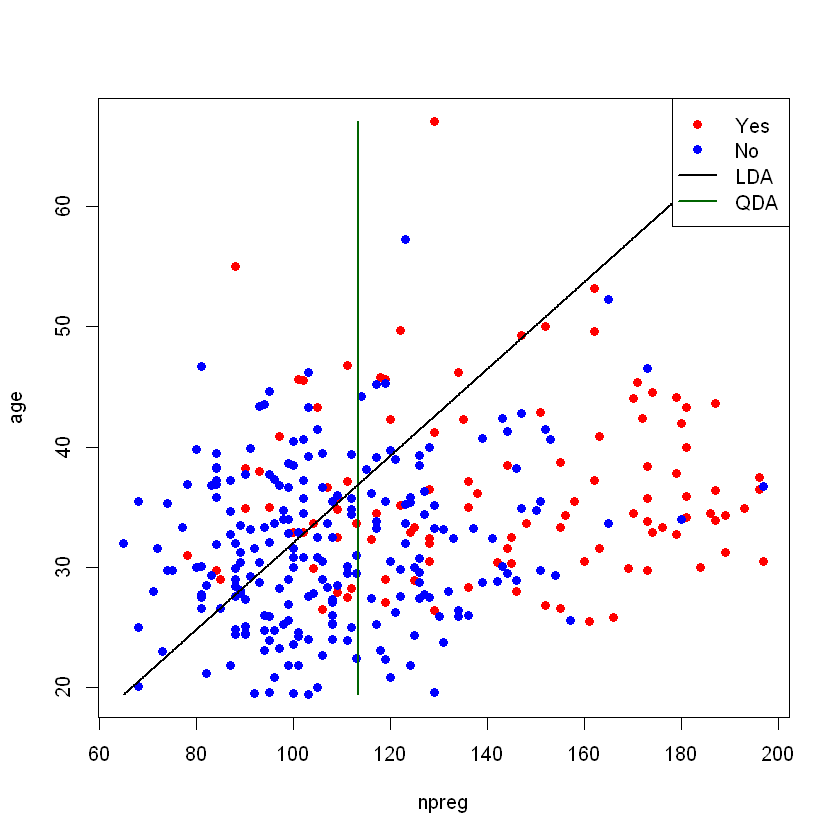

In [385]:
q2 = q.te
q2[q2 > 0] = 1
q2[q2 <=0] = 0

plot(nowa_yes$glu, nowa_yes$bmi, type = "p", 
     pch = 19, col = "red", xlab = "npreg", 
     ylab = "age", xlim = c(min_y.te, max_y.te), 
     ylim = c(min_c.te, max_c.te))
points(nowa_no$glu, nowa_no$bmi, pch = 19, col = "blue")

contour(y.te, c.te, z = matrix(q2, nrow = np, ncol = np), 
        levels = c(1,2), add = TRUE, drawlabels = FALSE, 
        col='darkgreen', lwd = 2)
lines(y.te, c.te, col = "black", lwd = 2)
legend("topright", c("Yes", "No", "LDA", "QDA"),
      col = c("red", "blue", "black", "darkgreen"), 
      pch = c(19, 19, NA, NA), lty = c(NA, NA, 1, 1), 
      lwd = c(1, 1, 2, 2))

In [386]:
nowa_w=rbind(nowa_yes,nowa_no)

In [387]:
mo<- lm(type~.,data=nowa_w)
summary(mo)


Call:
lm(formula = type ~ ., data = nowa_w)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00136 -0.24801  0.07314  0.25708  1.14012 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.0210033  0.1438208  14.052  < 2e-16 ***
npreg       -0.0225630  0.0086550  -2.607  0.00956 ** 
glu         -0.0064066  0.0007505  -8.536 5.44e-16 ***
bp           0.0010387  0.0018518   0.561  0.57525    
skin        -0.0010666  0.0028935  -0.369  0.71265    
bmi         -0.0117351  0.0040698  -2.883  0.00420 ** 
ped         -0.1389474  0.0600489  -2.314  0.02130 *  
age         -0.0027612  0.0028291  -0.976  0.32980    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3812 on 324 degrees of freedom
Multiple R-squared:  0.3569,	Adjusted R-squared:  0.3431 
F-statistic: 25.69 on 7 and 324 DF,  p-value: < 2.2e-16


In [388]:
mo<- lm(type~. -skin,data=nowa_w)
summary(mo)


Call:
lm(formula = type ~ . - skin, data = nowa_w)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00680 -0.25098  0.07691  0.25630  1.13626 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.0219356  0.1436073  14.080  < 2e-16 ***
npreg       -0.0228799  0.0086007  -2.660   0.0082 ** 
glu         -0.0064224  0.0007483  -8.583 3.88e-16 ***
bp           0.0010744  0.0018468   0.582   0.5611    
bmi         -0.0126743  0.0031694  -3.999 7.88e-05 ***
ped         -0.1400156  0.0598992  -2.338   0.0200 *  
age         -0.0027557  0.0028253  -0.975   0.3301    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3807 on 325 degrees of freedom
Multiple R-squared:  0.3567,	Adjusted R-squared:  0.3448 
F-statistic: 30.03 on 6 and 325 DF,  p-value: < 2.2e-16


In [389]:
mo<- lm(type~ . -skin -bp,data=nowa_w)
summary(mo)


Call:
lm(formula = type ~ . - skin - bp, data = nowa_w)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02632 -0.24755  0.07513  0.24606  1.13559 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.0647791  0.1231632  16.765  < 2e-16 ***
npreg       -0.0230394  0.0085876  -2.683  0.00767 ** 
glu         -0.0064003  0.0007466  -8.573 4.12e-16 ***
bmi         -0.0120757  0.0029947  -4.032 6.88e-05 ***
ped         -0.1426191  0.0596712  -2.390  0.01741 *  
age         -0.0023235  0.0027231  -0.853  0.39415    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3803 on 326 degrees of freedom
Multiple R-squared:  0.356,	Adjusted R-squared:  0.3461 
F-statistic: 36.04 on 5 and 326 DF,  p-value: < 2.2e-16


In [390]:
mo<- lm(type~ . -skin -bp -age,data=nowa_w)
summary(mo)


Call:
lm(formula = type ~ . - skin - bp - age, data = nowa_w)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02284 -0.24202  0.07269  0.24446  1.15687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.0271463  0.1149472  17.635  < 2e-16 ***
npreg       -0.0279134  0.0064094  -4.355 1.78e-05 ***
glu         -0.0065260  0.0007316  -8.921  < 2e-16 ***
bmi         -0.0120981  0.0029934  -4.042 6.62e-05 ***
ped         -0.1471613  0.0594085  -2.477   0.0138 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3801 on 327 degrees of freedom
Multiple R-squared:  0.3546,	Adjusted R-squared:  0.3467 
F-statistic: 44.91 on 4 and 327 DF,  p-value: < 2.2e-16


# Zadanie 14

In [391]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/dane_wino.txt", sep=",")
head(dane)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### i)
 Wybrać optymalną wartość współczynnika złożoności i wyznaczyć ponownie 
drzewo z uzyskaną wartością współczynnika złożoności.

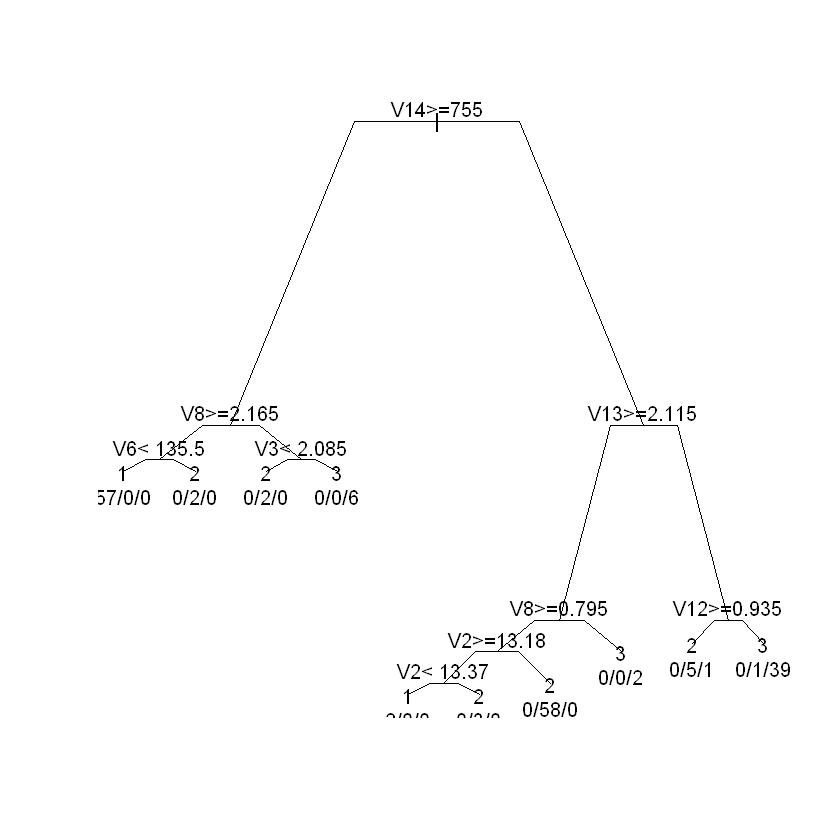

In [392]:
drzewo = rpart(as.factor(V1) ~ ., data = dane, minsplit = 5, cp = 0.0001)
plot(drzewo,  branch = 0.4)
text(drzewo, use.n = TRUE)

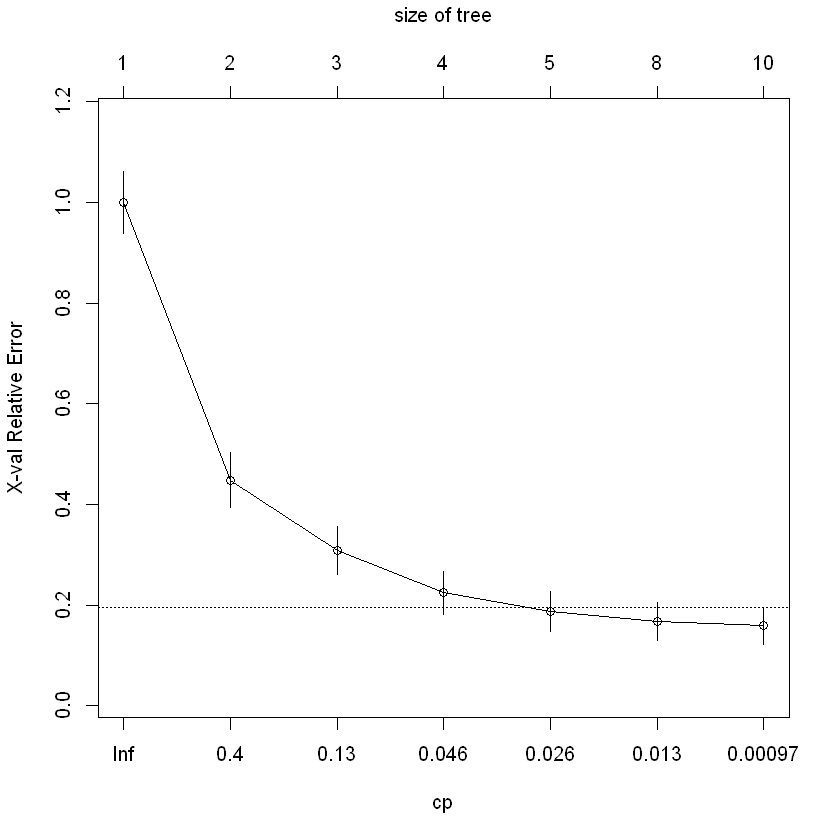

In [393]:
plotcp(drzewo)

### Interpretacja
- Wartość optymalna współczynnika złóżoności to 0.026.

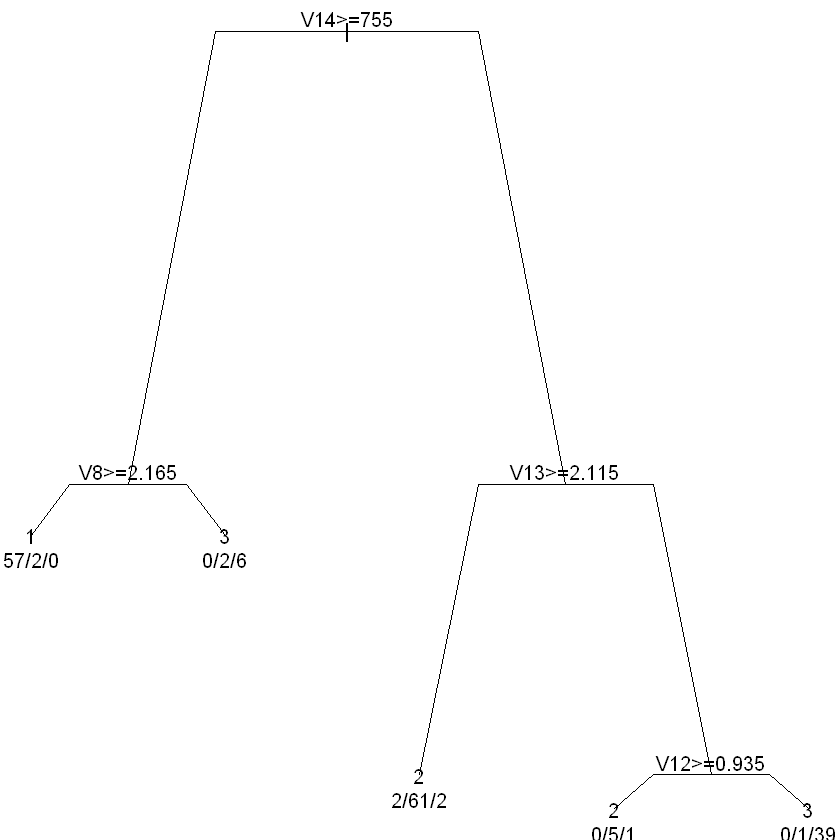

In [394]:
drzewo2 = rpart(as.factor(V1) ~ ., data = dane, minsplit = 5, cp = 0.026)
par(mar=c(0, 0, 0, 0))
plot(drzewo2, branch = 0.6)
text(drzewo2, use.n = TRUE)

### ii)
Wybrać drzewo optymalne przy pomocy metody kros-walidacji.

In [395]:
n = nrow(dane)
wyniki = rep(0, n)
wyniki2 = rep(0, n)

for (i in 1:n) {
    train = dane[-i, ]
    test = dane[i, ]
    drzewo_1 = rpart(factor(V1) ~ ., data = train, minsplit = 5, cp = 0.0001)
    drzewo_2 = rpart(as.factor(V1) ~ ., data = dane, minsplit = 5, cp = 0.026)
    pred_1 = predict(drzewo_1, newdata = test, type = "class")
    pred_2 = predict(drzewo_2, newdata = test, type = "class")   
    if (pred_1 != factor(test$V1))
        wyniki[i] = 1
    if (pred_2 != factor(test$V1))
        wyniki2[i] = 1
}

In [396]:
sum(wyniki) / n * 100
sum(wyniki2) / n * 100

[1] 11.79775

[1] 5.617978

In [397]:
upk <- 100-5.618
upk

[1] 94.382

In [398]:
upk2 <- 100-11.798
upk2

[1] 88.202

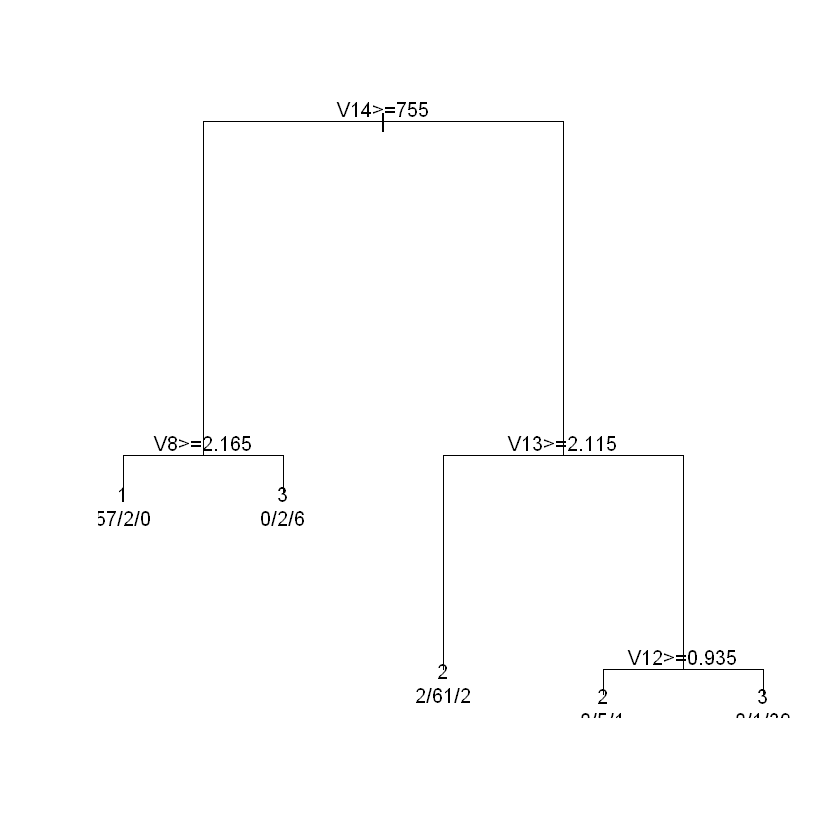

In [399]:
drzewo_3 = prune.rpart(drzewo, cp = 0.026)
plot(drzewo_3)
text(drzewo_3, use.n = TRUE)

### Interpretacja
- Metoda kros-walidacji pokazuje, iż drzewo o współczynniku złożoności 0.026 jest bardziej optymalne, posiada mniejszy błąd klasyfikacji.

### iii)
Następnie oszacować ułamek poprawnych klasyfikacji oraz błąd klasyfikacji na 
podstawie kros-walidacji.

### Interpretacja
- Ułamek poprawnych klasyfikacji z współczynnikiem 0.0001 wynosi 88.202.
- Błąd klasyfikacji z współczynnikiem 0.0001 to 11.798.
- Ułamek poprawnych klasyfikacji z współczynnikiem 0.026 wynosi 94.382.
- Błąd klasyfikacji z współczynnikiem 0.026 to 5.618.

### iv)
Porównać wartości z podpunktu nr 3 dla drzewa ze współczynnikiem 
złożoności=0.005. Które drzewo jest lepsze?

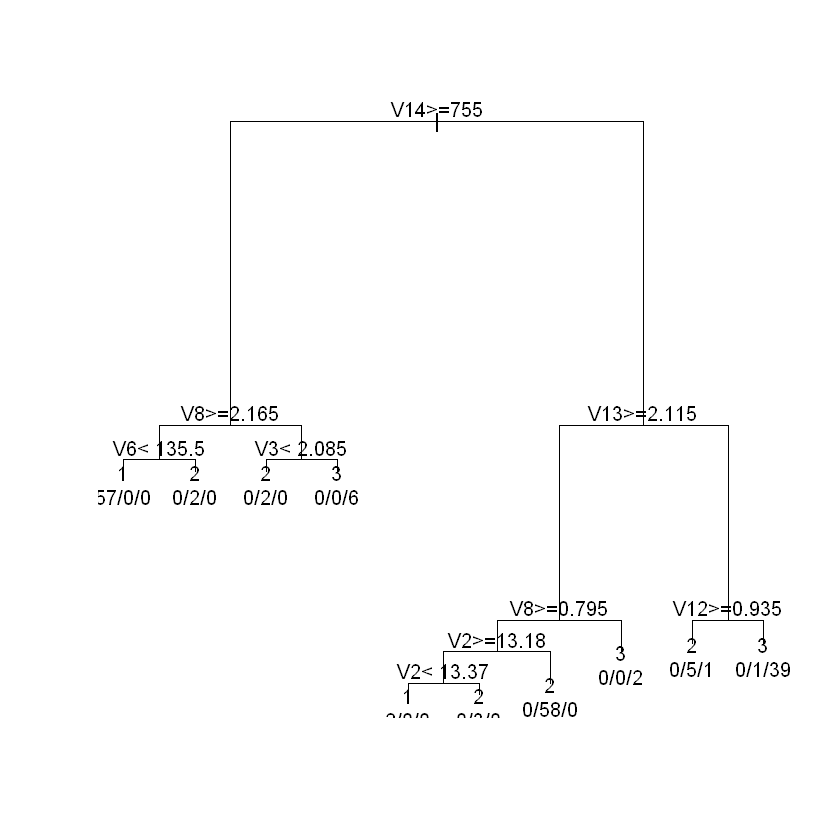

In [400]:
drzewo_4 = prune.rpart(drzewo, cp = 0.005)
plot(drzewo_4)
text(drzewo_4, use.n = TRUE)

In [401]:
n = nrow(dane)
wyniki = rep(0, n)
wyniki2 = rep(0, n)
wyniki3 = rep(0, n)

for (i in 1:n) {
    train = dane[-i, ]
    test = dane[i, ]
    drzewo_1 = rpart(factor(V1) ~ ., data = train, minsplit = 5, cp = 0.0001)
    drzewo_2 = rpart(as.factor(V1) ~ ., data = dane, minsplit = 5, cp = 0.026)
    drzewo_3 = rpart(factor(V1) ~ ., data = train, minsplit = 5, cp = 0.005)
    pred_1 = predict(drzewo_1, newdata = test, type = "class")
    pred_2 = predict(drzewo_2, newdata = test, type = "class")
    pred_3 = predict(drzewo_3, newdata = test, type = "class")
    if (pred_1 != factor(test$V1))
        wyniki[i] = 1
    if (pred_2 != factor(test$V1))
        wyniki2[i] = 1
    if (pred_3 != factor(test$V1))
        wyniki3[i] = 1
}

In [402]:
sum(wyniki) / n * 100
sum(wyniki2) / n * 100
sum(wyniki3) / n * 100

[1] 11.79775

[1] 5.617978

[1] 11.79775

### Interpretacja
- Drzewo ze współczynnikiem złożoności 0.026 jest lepsze.

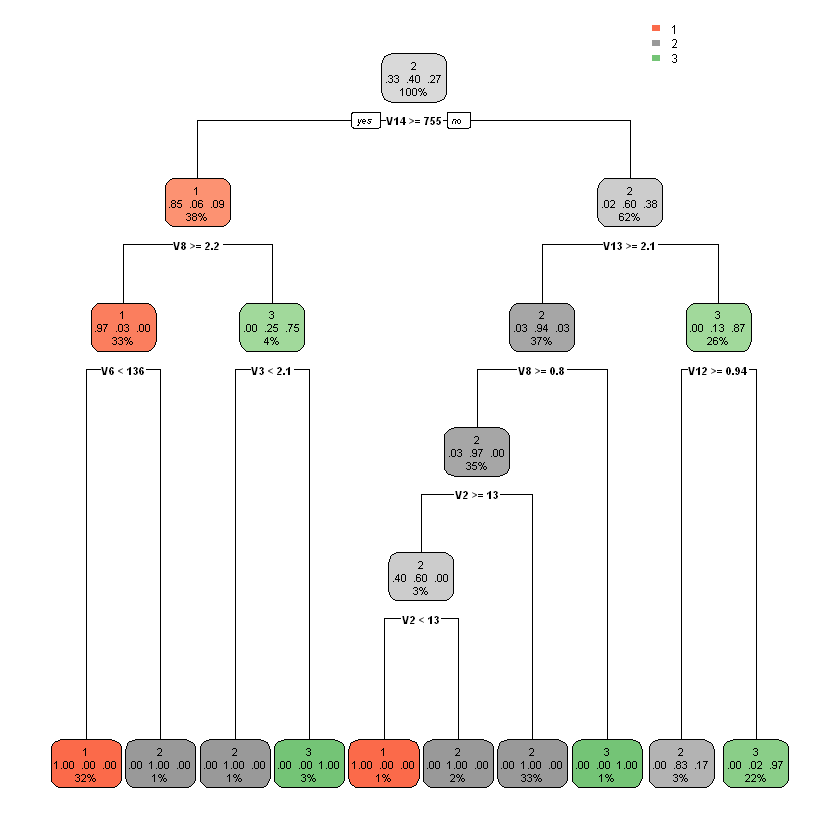

In [403]:
rpart.plot(drzewo)

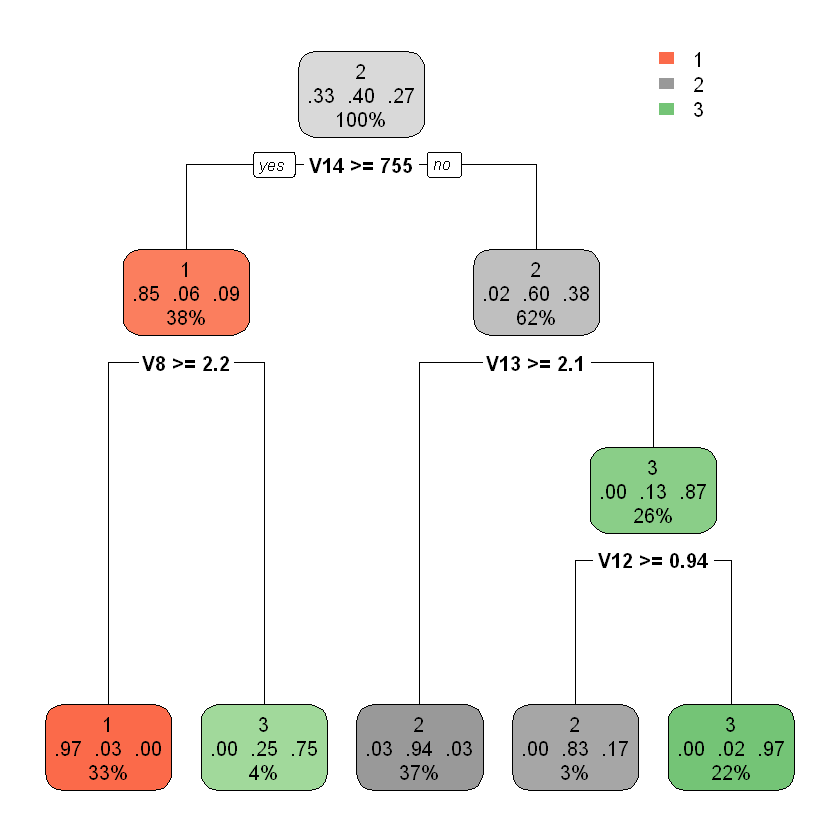

In [404]:
rpart.plot(drzewo2)

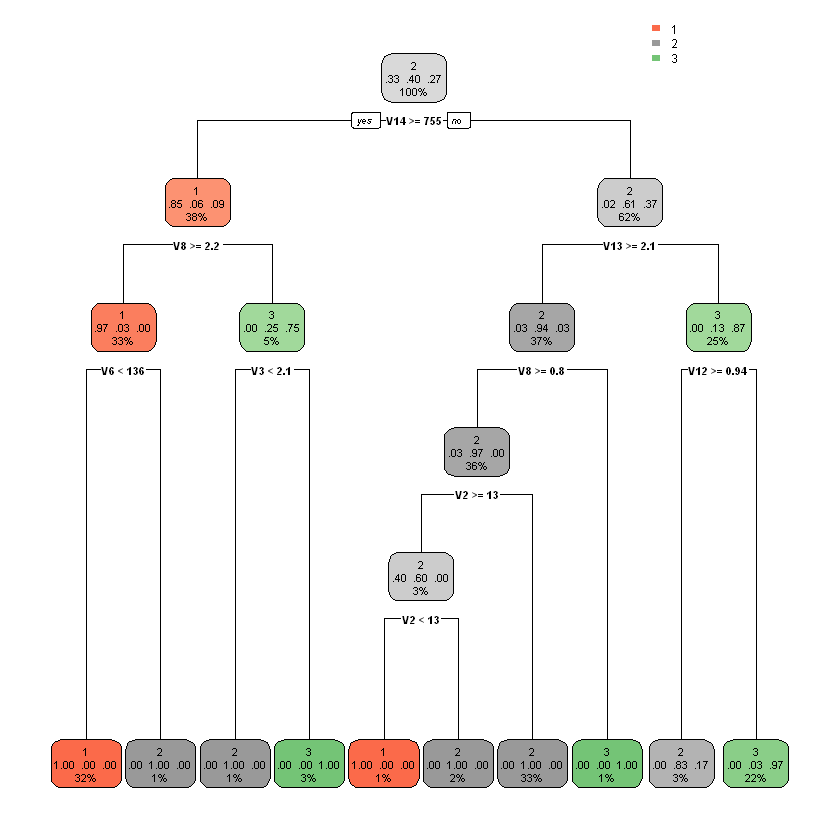

In [405]:
rpart.plot(drzewo_3)

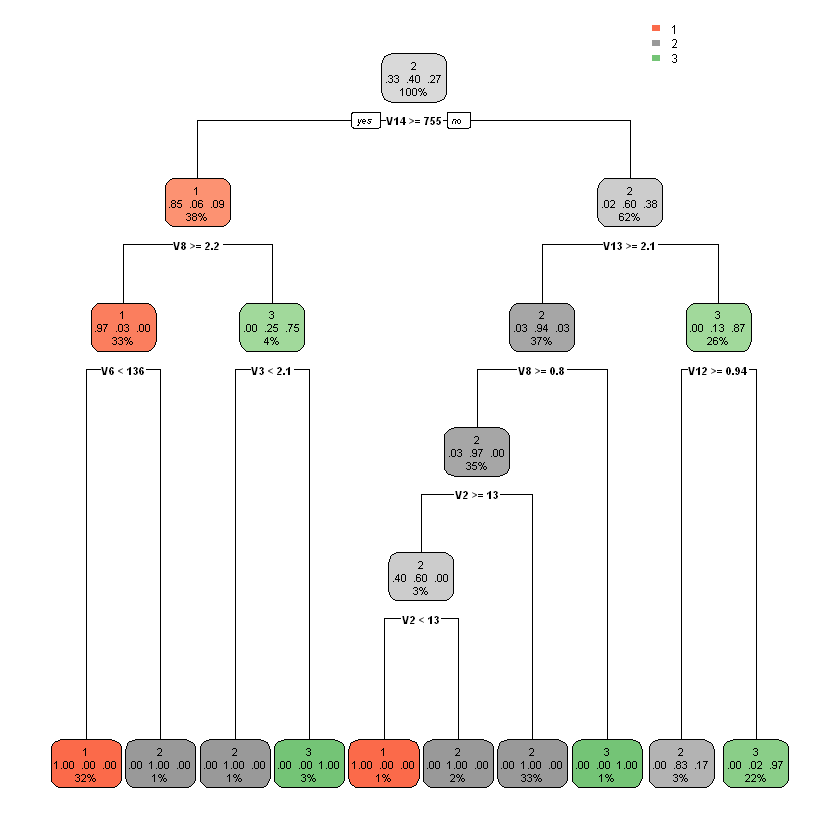

In [406]:
rpart.plot(drzewo_4)